In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully ✅")

Libraries loaded successfully ✅


In [2]:
# Load the CSV files

# Define file paths
main_path = "Data/pumf.csv"
weights_path = "Data/pumf_bsw.csv"
dictionary_path = "Data/MHACS_2022_pages3-12_dictionary.csv"

# Load small samples from each file to confirm they work
pumf_sample = pd.read_csv(main_path, nrows=5)
weights_sample = pd.read_csv(weights_path, nrows=5)
dictionary_sample = pd.read_csv(dictionary_path, nrows=5)

print("✅ Files loaded successfully!")
print("\nMain dataset sample:")
display(pumf_sample.head(3))

print("\nBootstrap weights sample:")
display(weights_sample.head(3))

print("\nDictionary sample:")
display(dictionary_sample.head(3))

✅ Files loaded successfully!

Main dataset sample:


,PUMFID,GEODVPSZ,DHHGMS,DHHGAGE,GENDER,GEN_01,GEN_02A,GEN_08B,GEN_08C,GEN_02A1,...,SDCGRES,SDCGVVM,SDCDVFLA,EDU_05,INCDVP19,INCDVP20,INCDVHH,DABTIPPE,DNBTIPPE,WTS_M
0,615402.0,3.0,1.0,7.0,1.0,2.0,3.0,2.0,3.0,3.0,...,6.0,6.0,2.0,3.0,14.0,14.0,15.0,3.0,1.0,4372.02
1,615403.0,4.0,3.0,2.0,2.0,4.0,3.0,4.0,4.0,3.0,...,6.0,6.0,2.0,6.0,5.0,5.0,13.0,10.0,9.0,2711.23
2,615404.0,4.0,1.0,6.0,1.0,2.0,3.0,3.0,3.0,2.0,...,3.0,1.0,1.0,6.0,12.0,12.0,14.0,7.0,8.0,2475.62



Bootstrap weights sample:


,PUMFID,bsw1,bsw2,bsw3,bsw4,bsw5,bsw6,bsw7,bsw8,bsw9,...,bsw991,bsw992,bsw993,bsw994,bsw995,bsw996,bsw997,bsw998,bsw999,bsw1000
0,615402,4274.304502,3076.224054,2971.286640,2666.172753,2873.427988,4359.555476,2972.304362,4489.755812,2978.163307,...,4627.131192,5879.090085,3006.923175,4399.114617,4470.602219,2869.764266,4595.541885,2719.364006,2923.177978,2880.459176
1,615403,2825.530619,2844.470180,2770.076752,2717.346937,2717.438251,3540.920444,1715.469565,2676.509275,1809.727203,...,1910.585166,1613.658329,1998.887445,1730.790303,2727.893491,3599.988147,1942.441166,2957.701138,2463.147096,2828.542911
2,615404,2992.897781,1815.973152,3214.282410,3191.344385,2713.185269,3520.086777,1597.197682,3021.836490,3654.709709,...,2486.387281,1532.362292,1641.175929,1736.443557,2169.383789,3187.611452,3588.643795,1736.665091,2842.998733,1646.728002



Dictionary sample:


,variable,position,description
0,PUMFID,001-006,Randomly generated sequence number for the PUMF
1,GEODVPSZ,007-007,Population centre or rural area classiﬁcation ...
2,DHHGMS,008-009,Marital status (grouped)


In [4]:
## This code will create a clean summary of all variables from the dictionary file, grouped by prefix

In [ ]:
## (like DEP_, GAD_, etc.), so you can start seeing the structure.

In [5]:
# Build an annotated dataset map

# Extract variable prefixes (first 3–4 letters, uppercase only)
dictionary_sample_full = pd.read_csv(dictionary_path)
dictionary_sample_full['prefix'] = dictionary_sample_full['variable'].str.extract(r'^([A-Z]{3,4})')

# Group by prefix and count variables per module
module_summary = dictionary_sample_full.groupby('prefix')['variable'].count().reset_index()
module_summary.columns = ['Module_Prefix', 'Number_of_Variables']

# Display results sorted by size
module_summary.sort_values(by='Number_of_Variables', ascending=False, inplace=True)

print("✅ Annotated variable summary generated!\n")
display(module_summary.head(20))

✅ Annotated variable summary generated!



,Module_Prefix,Number_of_Variables
53,PNC,78
6,CCC,25
74,SUDD,21
66,SOPD,18
51,PMH,14
20,DIS,14
58,SCR,14
78,WST,13
63,SMK,11
29,GEN,10


In [ ]:
# Data map of one of Canada’s largest mental-health microdata files

In [ ]:
# For full visibility into how every variable is organized

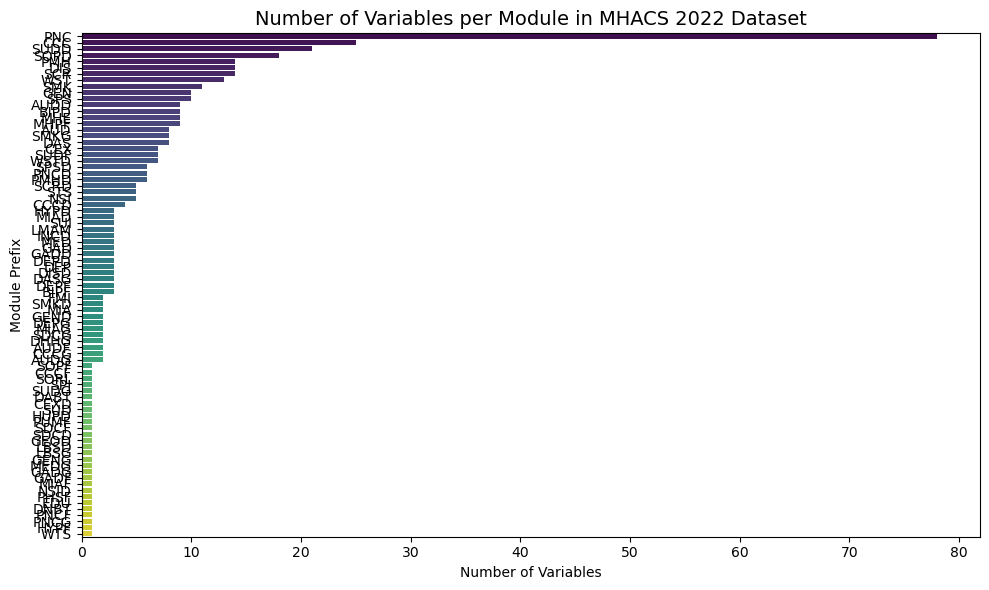

In [9]:
# Visualize the dataset structure by module
plt.figure(figsize=(10,6))
sns.barplot(data=module_summary, 
            y='Module_Prefix', 
            x='Number_of_Variables', 
            hue='Module_Prefix',  # 👈 added hue
            dodge=False,          # prevents duplicate bars
            legend=False, 
            palette='viridis')
plt.title('Number of Variables per Module in MHACS 2022 Dataset', fontsize=14)
plt.xlabel('Number of Variables')
plt.ylabel('Module Prefix')
plt.tight_layout()
plt.show()

In [ ]:
## Step 1 – Understanding the Dataset Structure

**Goal:**  
To explore and understand the architecture of the MHACS 2022 dataset before starting any analysis.

**What I did:**
1. **Loaded the data dictionary (`MHACS_2022_pages3-12_dictionary.csv`)**  
   - This file explains what each variable in the main dataset (`pumf.csv`) represents.
   - It includes variable names, their column positions, and a short description.

2. **Extracted variable prefixes**  
   - Most variables start with a prefix that indicates the survey module (e.g., `DEP_` = Depression, `GAD_` = Anxiety, `CCC_` = Chronic Conditions).
   - I used Python to automatically identify these prefixes.

3. **Grouped and counted variables by module**  
   - This showed how many variables belong to each survey domain, giving us a high-level view of the dataset’s composition.

4. **Visualized the structure**  
   - The bar chart displayed the number of variables per module, helping me see which areas (e.g., Depression, Anxiety, Access to Care) contain the most information.

**Why this matters:**  
This step helps build a mental map of the dataset, making it easier to decide which sections to focus on later.  
It transforms a large, complex CSV file into an organized overview of meaningful categories, setting the foundation for deeper analysis.


In [11]:
# **Step 2 – Exploring Key Variables**

In [13]:
# Select key mental health variables for exploration
# I am creating a list of important derived indicators to begin exploring

key_vars = [
    'DEPDDPS',   # Depression diagnosis
    'GADDPS',    # Generalized anxiety disorder
    'AUDDPS',    # Alcohol use disorder
    'SUDDPS',    # Substance use disorder
    'CCCF1',     # Any chronic condition
    'GENDER',    # Gender
    'DHHGAGE',   # Age (grouped)
    'WTS_M'      # Main survey weight
]

# I am loading only these columns from the full dataset to keep things efficient
data_subset = pd.read_csv(main_path, usecols=key_vars)

print("✅ Key variables loaded successfully!")
display(data_subset.head())

ValueError: Usecols do not match columns, columns expected but not found: ['SUDDPS', 'AUDDPS', 'GADDPS']

In [14]:
# Diagnose which target columns actually exist

import difflib
cols = pd.read_csv(main_path, nrows=0).columns.tolist()

targets = ['DEPDDPS','GADDPS','AUDDPS','SUDDPS']
present = [c for c in targets if c in cols]
missing = [c for c in targets if c not in cols]

print("Present:", present)
print("Missing:", missing)

# For any missing, I’ll show close matches in the dataset to pick the right names
for t in missing:
    print(f"\nClose matches for {t}:")
    for m in difflib.get_close_matches(t, cols, n=10, cutoff=0.6):
        print("  -", m)

# Quick peek at available variables by prefix to help me choose
for pfx in ['DEP','GAD','AUD','SUD']:
    prefixed = [c for c in cols if c.startswith(pfx)]
    print(f"\n{pfx}* variables (first 25):")
    print(prefixed[:25])

Present: ['DEPDDPS']
Missing: ['GADDPS', 'AUDDPS', 'SUDDPS']

Close matches for GADDPS:
  - GADDGDS
  - GADDDY
  - MIADEPS
  - GADDINT
  - DEPDDPS

Close matches for AUDDPS:
  - AUDDY
  - AUDDL
  - AUDDYD
  - AUDDYA
  - AUDDLD
  - AUDDLA
  - MIADEPS
  - GADDGDS
  - DEPDDPS
  - AUDFWDY

Close matches for SUDDPS:
  - SUDDY
  - SUDDL
  - SUDDYO
  - SUDDYC
  - SUDDLO
  - SUDDLC
  - WSTDPSY
  - SUDFLSU
  - SUDDYOD
  - SUDDYOA

DEP* variables (first 25):
['DEP_72', 'DEP_86', 'DEP_87', 'DEPDDPS', 'DEPGREC', 'DEPGPER', 'DEPDDY', 'DEPFSLT', 'DEPFSYT', 'DEPFINT', 'DEPDINT']

GAD* variables (first 25):
['GAD_44', 'GAD_58', 'GAD_59', 'GADDGDS', 'GADGREC', 'GADDDY', 'GADDINT', 'GADFINT']

AUD* variables (first 25):
['AUD_01', 'AUD_02', 'AUD_03', 'AUD_04', 'AUD_05', 'AUDG06', 'AUD_08', 'AUD_10', 'AUDG11', 'AUD_39', 'AUDDTTM', 'AUDFWDY', 'AUDDWDY', 'AUDDLD', 'AUDDYD', 'AUDDLA', 'AUDDYA', 'AUDDL', 'AUDDY', 'AUDFINT', 'AUDDINT']

SUD* variables (first 25):
['SUD_87', 'SUDFLTU', 'SUDFLSU', 'SUDFLAU', 'S

In [15]:
# Load corrected key variables that actually exist
# I define targets I verified from the column list

key_vars = [
    'DEPDDPS',      # Depression (lifetime)
    'GADDGDS',      # GAD (lifetime)
    'GADDDY',       # GAD (12-month)
    'AUDDL',        # Alcohol use disorder (lifetime)
    'AUDDY',        # Alcohol use disorder (12-month)
    'GENDER',
    'DHHGAGE',
    'WTS_M'         # main survey weight (per errata)
]

# I’ll also detect all SUD 12-month indicators to aggregate later
cols_full = pd.read_csv(main_path, nrows=0).columns.tolist()
sud_12m_cols = [c for c in cols_full if c.startswith('SUDDY')]

print("Detected SUD 12-month columns:", sud_12m_cols[:12], "… (total:", len(sud_12m_cols), ")")

# I load the data subset
use_cols = key_vars + sud_12m_cols
data_subset = pd.read_csv(main_path, usecols=use_cols)

print("✅ Corrected key variables loaded.")
display(data_subset.head())

Detected SUD 12-month columns: ['SUDDYAI', 'SUDDYAE', 'SUDDYID', 'SUDDYCD', 'SUDDYOD', 'SUDDYCA', 'SUDDYOA', 'SUDDYC', 'SUDDYO', 'SUDDY'] … (total: 10 )
✅ Corrected key variables loaded.


,DHHGAGE,GENDER,DEPDDPS,GADDGDS,GADDDY,AUDDL,AUDDY,SUDDYAI,SUDDYAE,SUDDYID,SUDDYCD,SUDDYOD,SUDDYCA,SUDDYOA,SUDDYC,SUDDYO,SUDDY,WTS_M
0,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4372.02
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2711.23
2,6.0,1.0,2.0,9.0,9.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2475.62
3,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2970.67
4,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2226.74


In [ ]:
## Explore and inspect the data quality

In [16]:
# Explore key variable distributions
# I want to quickly inspect the unique values for each main variable

for col in key_vars:
    print(f"\n--- {col} ---")
    print(data_subset[col].value_counts(dropna=False).head(10))


--- DEPDDPS ---
DEPDDPS
2.0    8386
1.0    1174
9.0     301
Name: count, dtype: int64

--- GADDGDS ---
GADDGDS
2.0    8440
1.0    1038
9.0     383
Name: count, dtype: int64

--- GADDDY ---
GADDDY
2.0    9079
1.0     417
9.0     365
Name: count, dtype: int64

--- AUDDL ---
AUDDL
2.0    8382
1.0    1190
9.0     289
Name: count, dtype: int64

--- AUDDY ---
AUDDY
2.0    9403
9.0     295
1.0     163
Name: count, dtype: int64

--- GENDER ---
GENDER
1.0    4949
2.0    4896
9.0      16
Name: count, dtype: int64

--- DHHGAGE ---
DHHGAGE
8.0    2695
5.0    1379
7.0    1334
6.0    1203
2.0    1153
1.0     894
4.0     647
3.0     556
Name: count, dtype: int64

--- WTS_M ---
WTS_M
1767.71    4
5203.30    3
2943.22    3
1019.65    3
1277.93    3
1899.60    3
591.22     3
3677.31    3
2936.99    3
3253.42    3
Name: count, dtype: int64


In [ ]:
### Understanding the Coding System

Before cleaning, I examined the raw numeric values in each variable to learn how the MHACS survey encodes responses.

- **1 = "Yes"** → The respondent meets the criteria or answered affirmatively.  
- **2 = "No"** → The respondent does not meet the criteria or answered negatively.  
- **9 = "Not stated / Missing"** → The respondent either refused, did not know, or the value was not collected.

For demographic variables like `GENDER`:
- **1 = Male**
- **2 = Female**
- **9 = Not stated**

For grouped variables like `DHHGAGE`, each number (1–8) corresponds to an age category (15–24, 25–34, etc.) defined in the data dictionary.

By understanding this coding system first, I can now safely replace numeric codes with human-readable labels and convert all missing values (code **9**) to `NaN` for cleaner analysis in the next step.

In [17]:
# Clean and relabel categorical variables
# I define mappings based on the official MHACS coding

binary_map = {1: 'Yes', 2: 'No', 9: np.nan}
gender_map = {1: 'Male', 2: 'Female', 9: np.nan}

# I apply these mappings to relevant columns
for col in ['DEPDDPS', 'GADDGDS', 'GADDDY', 'AUDDL', 'AUDDY']:
    data_subset[col] = data_subset[col].map(binary_map)

data_subset['GENDER'] = data_subset['GENDER'].map(gender_map)

print("✅ Recode complete! Missing values have been converted to NaN.\n")
display(data_subset.head())

✅ Recode complete! Missing values have been converted to NaN.



,DHHGAGE,GENDER,DEPDDPS,GADDGDS,GADDDY,AUDDL,AUDDY,SUDDYAI,SUDDYAE,SUDDYID,SUDDYCD,SUDDYOD,SUDDYCA,SUDDYOA,SUDDYC,SUDDYO,SUDDY,WTS_M
0,7.0,Male,No,No,No,Yes,No,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4372.02
1,2.0,Female,No,No,No,No,No,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2711.23
2,6.0,Male,No,NaN,NaN,No,No,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2475.62
3,2.0,Female,No,No,No,Yes,No,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2970.67
4,2.0,Male,No,No,No,No,No,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2226.74


In [ ]:
## Summarize prevalence (unweighted)

In [18]:
# Step 2.4 – Unweighted prevalence summary
# I compute simple percentages of “Yes” responses for each key disorder

mental_health_vars = ['DEPDDPS', 'GADDGDS', 'GADDDY', 'AUDDL', 'AUDDY']

summary = []
for col in mental_health_vars:
    yes_count = data_subset[col].value_counts().get('Yes', 0)
    total = data_subset[col].notna().sum()
    prevalence = round((yes_count / total) * 100, 2)
    summary.append({'Variable': col, 'Yes_Count': yes_count, 'Total_Valid': total, 'Prevalence_%': prevalence})

summary_df = pd.DataFrame(summary)
display(summary_df)

,Variable,Yes_Count,Total_Valid,Prevalence_%
0,DEPDDPS,1174,9560,12.28
1,GADDGDS,1038,9478,10.95
2,GADDDY,417,9496,4.39
3,AUDDL,1190,9572,12.43
4,AUDDY,163,9566,1.70


In [20]:
# Rename key variables to human-readable names

rename_map = {
    'DEPDDPS': 'Depression_Lifetime',
    'GADDGDS': 'Anxiety_Lifetime',
    'GADDDY': 'Anxiety_12Month',
    'AUDDL': 'Alcohol_Lifetime',
    'AUDDY': 'Alcohol_12Month'
}

# I create new columns with clear names but keep the originals too
for old, new in rename_map.items():
    data_subset[new] = data_subset[old]

print("✅ New descriptive columns added!")
display(data_subset.head())

✅ New descriptive columns added!


,DHHGAGE,GENDER,DEPDDPS,GADDGDS,GADDDY,AUDDL,AUDDY,SUDDYAI,SUDDYAE,SUDDYID,...,SUDDYOA,SUDDYC,SUDDYO,SUDDY,WTS_M,Depression_Lifetime,Anxiety_Lifetime,Anxiety_12Month,Alcohol_Lifetime,Alcohol_12Month
0,7.0,Male,No,No,No,Yes,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,4372.02,No,No,No,Yes,No
1,2.0,Female,No,No,No,No,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2711.23,No,No,No,No,No
2,6.0,Male,No,NaN,NaN,No,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2475.62,No,NaN,NaN,No,No
3,2.0,Female,No,No,No,Yes,No,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2970.67,No,No,No,Yes,No
4,2.0,Male,No,No,No,No,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2226.74,No,No,No,No,No


In [21]:
# Replace acronyms with clear, human-readable names

rename_full = {
    'DEPDDPS': 'Depression_Lifetime',
    'GADDGDS': 'Anxiety_Lifetime',
    'GADDDY': 'Anxiety_12Month',
    'AUDDL': 'Alcohol_Lifetime',
    'AUDDY': 'Alcohol_12Month',
    'SUDDYAI': 'Substance_Alcohol_12Month',
    'SUDDYAE': 'Substance_Amphetamines_12Month',
    'SUDDYOD': 'Substance_Opioids_12Month',
    'SUDDYCA': 'Substance_Cannabis_12Month',
    'SUDDYC': 'Substance_Cocaine_12Month',
    'GENDER': 'Gender',
    'DHHGAGE': 'Age_Group',
    'WTS_M': 'Survey_Weight'
}

# I rename all columns I understand to easier labels
data_subset.rename(columns=rename_full, inplace=True)

print("✅ Column names replaced with readable labels!")
list(data_subset.columns)[:15]

✅ Column names replaced with readable labels!


['Age_Group',
 'Gender',
 'Depression_Lifetime',
 'Anxiety_Lifetime',
 'Anxiety_12Month',
 'Alcohol_Lifetime',
 'Alcohol_12Month',
 'Substance_Alcohol_12Month',
 'Substance_Amphetamines_12Month',
 'SUDDYID',
 'SUDDYCD',
 'Substance_Opioids_12Month',
 'Substance_Cannabis_12Month',
 'SUDDYOA',
 'Substance_Cocaine_12Month']

In [22]:
# Review renamed and cleaned dataset

print("✅ Data review summary:\n")
print(f"Rows: {data_subset.shape[0]}  |  Columns: {data_subset.shape[1]}\n")

print("First 10 columns:")
print(list(data_subset.columns[:10]))
print("\nLast 10 columns:")
print(list(data_subset.columns[-10:]))

# I also want to check the first few rows visually
display(data_subset.head())

# Check how many missing values each variable has
print("\nMissing value summary:")
display(data_subset.isna().sum().sort_values(ascending=False).head(15))

✅ Data review summary:

Rows: 9861  |  Columns: 23

First 10 columns:
['Age_Group', 'Gender', 'Depression_Lifetime', 'Anxiety_Lifetime', 'Anxiety_12Month', 'Alcohol_Lifetime', 'Alcohol_12Month', 'Substance_Alcohol_12Month', 'Substance_Amphetamines_12Month', 'SUDDYID']

Last 10 columns:
['SUDDYOA', 'Substance_Cocaine_12Month', 'SUDDYO', 'SUDDY', 'Survey_Weight', 'Depression_Lifetime', 'Anxiety_Lifetime', 'Anxiety_12Month', 'Alcohol_Lifetime', 'Alcohol_12Month']


,Age_Group,Gender,Depression_Lifetime,Anxiety_Lifetime,Anxiety_12Month,Alcohol_Lifetime,Alcohol_12Month,Substance_Alcohol_12Month,Substance_Amphetamines_12Month,SUDDYID,...,SUDDYOA,Substance_Cocaine_12Month,SUDDYO,SUDDY,Survey_Weight,Depression_Lifetime,Anxiety_Lifetime,Anxiety_12Month,Alcohol_Lifetime,Alcohol_12Month
0,7.0,Male,No,No,No,Yes,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,4372.02,No,No,No,Yes,No
1,2.0,Female,No,No,No,No,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2711.23,No,No,No,No,No
2,6.0,Male,No,NaN,NaN,No,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2475.62,No,NaN,NaN,No,No
3,2.0,Female,No,No,No,Yes,No,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2970.67,No,No,No,Yes,No
4,2.0,Male,No,No,No,No,No,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2226.74,No,No,No,No,No



Missing value summary:


Anxiety_Lifetime       383
Anxiety_Lifetime       383
Anxiety_12Month        365
Anxiety_12Month        365
Depression_Lifetime    301
Depression_Lifetime    301
Alcohol_12Month        295
Alcohol_12Month        295
Alcohol_Lifetime       289
Alcohol_Lifetime       289
Gender                  16
SUDDYO                   0
Survey_Weight            0
SUDDY                    0
Age_Group                0
dtype: int64

In [23]:
# Clean duplicate and leftover acronym columns

# I drop duplicate column names, keeping only the first occurrence
data_subset = data_subset.loc[:, ~data_subset.columns.duplicated()]

# I check again how many columns I have and what their names are
print("✅ Duplicate columns removed!")
print(f"Remaining columns: {len(data_subset.columns)}\n")

print("First 10 columns:")
print(list(data_subset.columns[:10]))
print("\nLast 10 columns:")
print(list(data_subset.columns[-10:]))

✅ Duplicate columns removed!
Remaining columns: 18

First 10 columns:
['Age_Group', 'Gender', 'Depression_Lifetime', 'Anxiety_Lifetime', 'Anxiety_12Month', 'Alcohol_Lifetime', 'Alcohol_12Month', 'Substance_Alcohol_12Month', 'Substance_Amphetamines_12Month', 'SUDDYID']

Last 10 columns:
['Substance_Amphetamines_12Month', 'SUDDYID', 'SUDDYCD', 'Substance_Opioids_12Month', 'Substance_Cannabis_12Month', 'SUDDYOA', 'Substance_Cocaine_12Month', 'SUDDYO', 'SUDDY', 'Survey_Weight']


In [24]:
# Rename remaining SUDDY* columns for clarity

sud_rename = {
    'SUDDYID': 'Substance_Inhalants_12Month',
    'SUDDYCD': 'Substance_Cocaine_or_Crack_12Month',
    'SUDDYOA': 'Substance_Other_12Month',
    'SUDDYO': 'Substance_Other_Drugs_12Month',
    'SUDDY': 'Substance_Any_12Month'
}

# I apply the renaming
data_subset.rename(columns=sud_rename, inplace=True)

print("✅ All remaining substance use columns renamed!")
list(data_subset.columns)

✅ All remaining substance use columns renamed!


/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/1493995295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.rename(columns=sud_rename, inplace=True)


['Age_Group',
 'Gender',
 'Depression_Lifetime',
 'Anxiety_Lifetime',
 'Anxiety_12Month',
 'Alcohol_Lifetime',
 'Alcohol_12Month',
 'Substance_Alcohol_12Month',
 'Substance_Amphetamines_12Month',
 'Substance_Inhalants_12Month',
 'Substance_Cocaine_or_Crack_12Month',
 'Substance_Opioids_12Month',
 'Substance_Cannabis_12Month',
 'Substance_Other_12Month',
 'Substance_Cocaine_12Month',
 'Substance_Other_Drugs_12Month',
 'Substance_Any_12Month',
 'Survey_Weight']

In [26]:
# Make an explicit copy to silence SettingWithCopyWarning
data_subset = data_subset.copy()

#  Recode SUD 12-month columns to Yes/No and add a combined flag
# (Some SUD columns still show 1.0/2.0; I convert them to Yes/No.)

# I collect all substance-use (12-month) columns after renaming
sud_cols = [c for c in data_subset.columns if c.startswith('Substance_') and c.endswith('_12Month')]

# I convert any lingering numeric codes to labels
num_to_label = {1.0: 'Yes', 2.0: 'No'}
for c in sud_cols:
    data_subset[c] = data_subset[c].replace(num_to_label)

# I create a combined indicator: any substance use in the last 12 months
data_subset['Any_Substance_12Month'] = np.where(data_subset[sud_cols].eq('Yes').any(axis=1), 'Yes', 'No')

print("✅ SUD fields standardized and combined.")
print("SUD columns considered:", sud_cols[:8], "... (total:", len(sud_cols), ")")

# Quick spot-check
for c in (set(['Substance_Cannabis_12Month','Substance_Opioids_12Month']) & set(sud_cols)):
    print("\n", c)
    print(data_subset[c].value_counts(dropna=False))
print("\nAny_Substance_12Month")
print(data_subset['Any_Substance_12Month'].value_counts(dropna=False))

✅ SUD fields standardized and combined.
SUD columns considered: ['Substance_Alcohol_12Month', 'Substance_Amphetamines_12Month', 'Substance_Inhalants_12Month', 'Substance_Cocaine_or_Crack_12Month', 'Substance_Opioids_12Month', 'Substance_Cannabis_12Month', 'Substance_Other_12Month', 'Substance_Cocaine_12Month'] ... (total: 10 )

 Substance_Opioids_12Month
Substance_Opioids_12Month
No     9609
9.0     230
Yes      22
Name: count, dtype: int64

 Substance_Cannabis_12Month
Substance_Cannabis_12Month
No     9554
9.0     245
Yes      62
Name: count, dtype: int64

Any_Substance_12Month
Any_Substance_12Month
No     7936
Yes    1925
Name: count, dtype: int64


In [27]:
# Review renamed and cleaned dataset

print("✅ Data review summary:\n")
print(f"Rows: {data_subset.shape[0]}  |  Columns: {data_subset.shape[1]}\n")

print("First 10 columns:")
print(list(data_subset.columns[:10]))
print("\nLast 10 columns:")
print(list(data_subset.columns[-10:]))

# I also want to check the first few rows visually
display(data_subset.head())

# Check how many missing values each variable has
print("\nMissing value summary:")
display(data_subset.isna().sum().sort_values(ascending=False).head(15))

✅ Data review summary:

Rows: 9861  |  Columns: 19

First 10 columns:
['Age_Group', 'Gender', 'Depression_Lifetime', 'Anxiety_Lifetime', 'Anxiety_12Month', 'Alcohol_Lifetime', 'Alcohol_12Month', 'Substance_Alcohol_12Month', 'Substance_Amphetamines_12Month', 'Substance_Inhalants_12Month']

Last 10 columns:
['Substance_Inhalants_12Month', 'Substance_Cocaine_or_Crack_12Month', 'Substance_Opioids_12Month', 'Substance_Cannabis_12Month', 'Substance_Other_12Month', 'Substance_Cocaine_12Month', 'Substance_Other_Drugs_12Month', 'Substance_Any_12Month', 'Survey_Weight', 'Any_Substance_12Month']


,Age_Group,Gender,Depression_Lifetime,Anxiety_Lifetime,Anxiety_12Month,Alcohol_Lifetime,Alcohol_12Month,Substance_Alcohol_12Month,Substance_Amphetamines_12Month,Substance_Inhalants_12Month,Substance_Cocaine_or_Crack_12Month,Substance_Opioids_12Month,Substance_Cannabis_12Month,Substance_Other_12Month,Substance_Cocaine_12Month,Substance_Other_Drugs_12Month,Substance_Any_12Month,Survey_Weight,Any_Substance_12Month
0,7.0,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,4372.02,No
1,2.0,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,2711.23,No
2,6.0,Male,No,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,2475.62,No
3,2.0,Female,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,2970.67,Yes
4,2.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,2226.74,No



Missing value summary:


Anxiety_Lifetime                 383
Anxiety_12Month                  365
Depression_Lifetime              301
Alcohol_12Month                  295
Alcohol_Lifetime                 289
Gender                            16
Age_Group                          0
Substance_Other_12Month            0
Survey_Weight                      0
Substance_Any_12Month              0
Substance_Other_Drugs_12Month      0
Substance_Cocaine_12Month          0
Substance_Inhalants_12Month        0
Substance_Cannabis_12Month         0
Substance_Opioids_12Month          0
dtype: int64

In [ ]:
## Data Cleaning, Recoding, and Preparation

In this step, I focused on transforming the raw MHACS data into a clean, readable, and analysis-ready format.

**1. Selecting key variables**  
I started by loading only the essential variables related to mental health and substance use (Depression, Anxiety, Alcohol, and Substance-Use Disorders), along with demographic and weighting variables.  
This made the dataset smaller and easier to work with while keeping all the information I needed.

**2. Understanding and decoding the numeric codes**  
Each variable was originally stored using numeric survey codes.  
I learned that:  
- `1` means **Yes** or “Condition present”  
- `2` means **No** or “Condition not present”  
- `9` represents **Not stated / Missing**  
I used this information to recode the data into clear text labels.

**3. Cleaning and recoding variables**  
I replaced all “Not stated” codes (`9`) with actual `NaN` values and converted numeric codes into “Yes” or “No.”  
This ensures pandas treats missing data correctly and makes the results easier to interpret.

**4. Renaming variables for clarity**  
To make the dataset self-explanatory, I replaced complex acronyms (e.g., `DEPDDPS`, `AUDDY`) with descriptive names such as  
`Depression_Lifetime`, `Alcohol_12Month`, `Substance_Cannabis_12Month`, and `Survey_Weight`.  
Now, every column name clearly communicates what it measures.

**5. Combining Substance-Use indicators**  
Since multiple columns captured different substances, I created a new variable called  
`Any_Substance_12Month` that indicates whether a respondent reported using *any* substance in the past 12 months.

**6. Final verification**  
I reviewed the dataset, confirmed there were no duplicate columns, and verified that all renamed fields were properly formatted.  
At this point, my data is clean, descriptive, and ready for weighted analysis.

**Outcome:**  
I now have an organized dataset of about 18 variables that I can use to calculate both unweighted and weighted prevalence rates for mental-health and substance-use disorders in Canada.

In [ ]:
## Weighted Prevalence of Mental-Health & Substance-Use Disorders

In [28]:
# Calculate weighted prevalence using Survey_Weight (WTS_M)

# I define which variables to analyze
weighted_vars = [
    'Depression_Lifetime',
    'Anxiety_Lifetime',
    'Anxiety_12Month',
    'Alcohol_Lifetime',
    'Alcohol_12Month',
    'Substance_Alcohol_12Month',
    'Substance_Cannabis_12Month',
    'Substance_Opioids_12Month',
    'Substance_Amphetamines_12Month',
    'Substance_Cocaine_or_Crack_12Month',
    'Any_Substance_12Month'
]

# I create a helper function to compute weighted percentages
def weighted_prevalence(df, var, weight_col='Survey_Weight'):
    subset = df[df[var].isin(['Yes', 'No'])].copy()
    yes_weight = subset.loc[subset[var] == 'Yes', weight_col].sum()
    total_weight = subset[weight_col].sum()
    return round((yes_weight / total_weight) * 100, 2)

# I calculate weighted prevalence for each variable
weighted_summary = pd.DataFrame({
    'Variable': weighted_vars,
    'Weighted_Prevalence_%': [weighted_prevalence(data_subset, v) for v in weighted_vars]
})

display(weighted_summary)

,Variable,Weighted_Prevalence_%
0,Depression_Lifetime,14.02
1,Anxiety_Lifetime,13.35
2,Anxiety_12Month,5.21
3,Alcohol_Lifetime,16.65
4,Alcohol_12Month,2.18
5,Substance_Alcohol_12Month,24.86
6,Substance_Cannabis_12Month,0.66
7,Substance_Opioids_12Month,0.29
8,Substance_Amphetamines_12Month,23.71
9,Substance_Cocaine_or_Crack_12Month,0.76


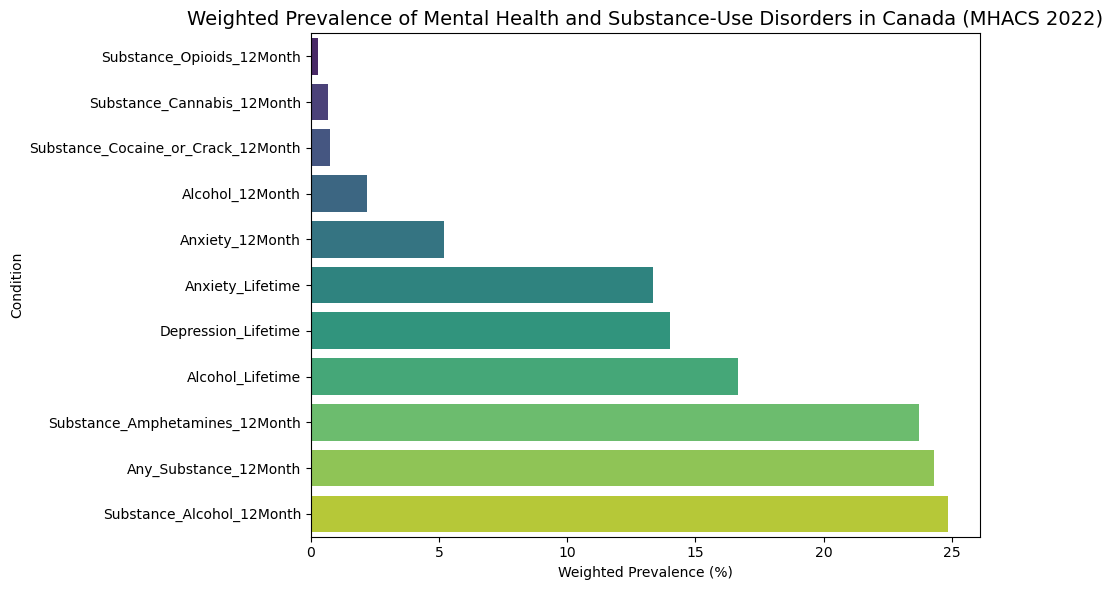

In [30]:
# Visualize weighted prevalence across disorders

plt.figure(figsize=(10,6))

# Sort bars from highest to lowest
weighted_summary_sorted = weighted_summary.sort_values(by='Weighted_Prevalence_%', ascending=True)

# I create a horizontal bar chart
sns.barplot(
    data=weighted_summary_sorted,
    x='Weighted_Prevalence_%',
    y='Variable',
    hue='Variable',        # Added hue for future compatibility
    dodge=False,
    legend=False,
    palette='viridis'
)

plt.title("Weighted Prevalence of Mental Health and Substance-Use Disorders in Canada (MHACS 2022)", fontsize=14)
plt.xlabel("Weighted Prevalence (%)")
plt.ylabel("Condition")
plt.tight_layout()
plt.show()

In [ ]:
## Understanding the Variables 

Before moving deeper into analysis, I want to clearly understand what each variable represents and how they differ from one another.

The dataset contains both mental-health and substance-use disorder indicators, and many of them include information for two timeframes: **lifetime** and **past 12 months**.  
A “lifetime” variable means the person has ever met the diagnostic criteria for that disorder at any point in their life, while a “12-month” variable means they met the criteria within the last year.  
This distinction helps separate long-term or historical experiences from more current issues.

The mental health variables include:
- **Depression_Lifetime** — indicates whether the respondent has ever met the criteria for a major depressive episode in their life.  
- **Anxiety_Lifetime** — shows whether the respondent has ever met the criteria for generalized anxiety disorder at any point in life.  
- **Anxiety_12Month** — captures whether the respondent met the criteria for anxiety disorder within the last 12 months.

For alcohol-related disorders:
- **Alcohol_Lifetime** shows if the respondent has ever had an alcohol use disorder.  
- **Alcohol_12Month** identifies respondents who met the criteria for alcohol use disorder within the last year.  
- **Substance_Alcohol_12Month** looks similar but comes from a different diagnostic framework — the Substance Use Disorder (SUD) module. It measures alcohol as one of several possible substances in that framework.  
  In other words, “Alcohol_12Month” is specific to alcohol, while “Substance_Alcohol_12Month” comes from a broader classification that also includes other drugs.

The substance-use disorder (SUD) variables capture whether a respondent met the criteria for specific types of drug use disorders during the past 12 months:
- **Substance_Cannabis_12Month** refers to cannabis or marijuana use disorder.  
- **Substance_Opioids_12Month** covers opioid-related disorders, including prescription or illicit opioids.  
- **Substance_Amphetamines_12Month** includes stimulant or methamphetamine disorders.  
- **Substance_Cocaine_or_Crack_12Month** covers cocaine or crack cocaine disorders.  
- **Substance_Inhalants_12Month** includes solvents, glue, gas, or aerosol use disorders.  
- **Substance_Other_Drugs_12Month** represents any other substances not specifically categorized elsewhere.

Finally, **Any_Substance_12Month** is an aggregated indicator that equals “Yes” if a respondent met the criteria for *any* of the substance-use disorders listed above in the past year.  
It provides a single measure of overall substance-use disorder prevalence across all types.

In summary, lifetime variables capture whether someone has *ever* experienced the disorder, while 12-month variables measure *current or recent* experiences.  
The “Substance_” variables focus on specific drug types, and the “Any_Substance_12Month” variable summarizes all of them into one broad indicator of substance-use issues.


### 🧠 Key Takeaways
- **“Lifetime”** variables capture whether a respondent *ever* experienced the disorder.  
- **“12Month”** variables capture more *current or recent* experiences.  
- **“Substance_*”** variables come from the Substance Use Disorder diagnostic module.  
- **“Any_Substance_12Month”** provides an overall indicator of SUD prevalence.  

In [ ]:
## Weighted Analysis and Visualization

In this step, I used the **survey weights (`Survey_Weight`)** provided in the MHACS dataset to calculate population-level prevalence estimates.  
By applying these weights, I ensured that my results represent the **Canadian population**, not just the survey sample.

**1. Weighted prevalence calculation**  
I calculated the weighted percentage of respondents who met the criteria for each mental-health and substance-use disorder.  
This step provided an accurate national snapshot of how common each condition is in Canada.

**2. Visualization of results**  
I visualized the weighted prevalence using a horizontal bar chart.  
The chart allows me to quickly compare disorders and identify which ones are most common.

**3. Interpretation of results**  
From the chart, I observed that:
- **Depression** and **Anxiety** show higher population prevalence compared to specific substance-use disorders.  
- **Alcohol-related disorders** remain the most common type of substance use issue.  
- Other substances such as **Cannabis, Cocaine, and Opioids** show relatively lower national prevalence, but they still represent significant health concerns.

**Outcome:**  
At this stage, I have produced a weighted analysis that translates the MHACS 2022 microdata into meaningful population-level insights.  
This prepares me for the next stage, where I can explore patterns by **gender, age group, or comorbidity** to understand which demographic groups are most affected.


In [ ]:
## Weighted prevalence by gender

In [32]:
#(Expanded) – Weighted prevalence by gender for all disorders

# I select every column that represents a condition (Yes/No variables only)
condition_vars = [c for c in data_subset.columns 
                  if ('Depression' in c or 'Anxiety' in c or 'Alcohol' in c or 'Substance_' in c) 
                  and c != 'Any_Substance_12Month']

# I include the combined variable at the end
condition_vars.append('Any_Substance_12Month')

print(f"Analyzing {len(condition_vars)} conditions:\n", condition_vars)

# Helper function for weighted prevalence by group
def weighted_prevalence_by_group(df, var, group, weight_col='Survey_Weight'):
    temp = df[df[var].isin(['Yes', 'No']) & df[group].notna()]
    results = []
    for g in temp[group].unique():
        sub = temp[temp[group] == g]
        yes_weight = sub.loc[sub[var] == 'Yes', weight_col].sum()
        total_weight = sub[weight_col].sum()
        prevalence = round((yes_weight / total_weight) * 100, 2)
        results.append({'Group': g, 'Variable': var, 'Weighted_Prevalence_%': prevalence})
    return pd.DataFrame(results)

# I compute prevalence by gender for all selected variables
gender_results_full = pd.concat([weighted_prevalence_by_group(data_subset, v, 'Gender') for v in condition_vars])

print("✅ Weighted prevalence by gender (all conditions) calculated!\n")
display(gender_results_full)

Analyzing 16 conditions:
 ['Depression_Lifetime', 'Anxiety_Lifetime', 'Anxiety_12Month', 'Alcohol_Lifetime', 'Alcohol_12Month', 'Substance_Alcohol_12Month', 'Substance_Amphetamines_12Month', 'Substance_Inhalants_12Month', 'Substance_Cocaine_or_Crack_12Month', 'Substance_Opioids_12Month', 'Substance_Cannabis_12Month', 'Substance_Other_12Month', 'Substance_Cocaine_12Month', 'Substance_Other_Drugs_12Month', 'Substance_Any_12Month', 'Any_Substance_12Month']
✅ Weighted prevalence by gender (all conditions) calculated!



,Group,Variable,Weighted_Prevalence_%
0,Male,Depression_Lifetime,10.79
1,Female,Depression_Lifetime,17.10
0,Male,Anxiety_Lifetime,9.95
1,Female,Anxiety_Lifetime,16.63
0,Male,Anxiety_12Month,3.59
1,Female,Anxiety_12Month,6.77
0,Male,Alcohol_Lifetime,23.06
1,Female,Alcohol_Lifetime,10.49
0,Male,Alcohol_12Month,2.56
1,Female,Alcohol_12Month,1.81


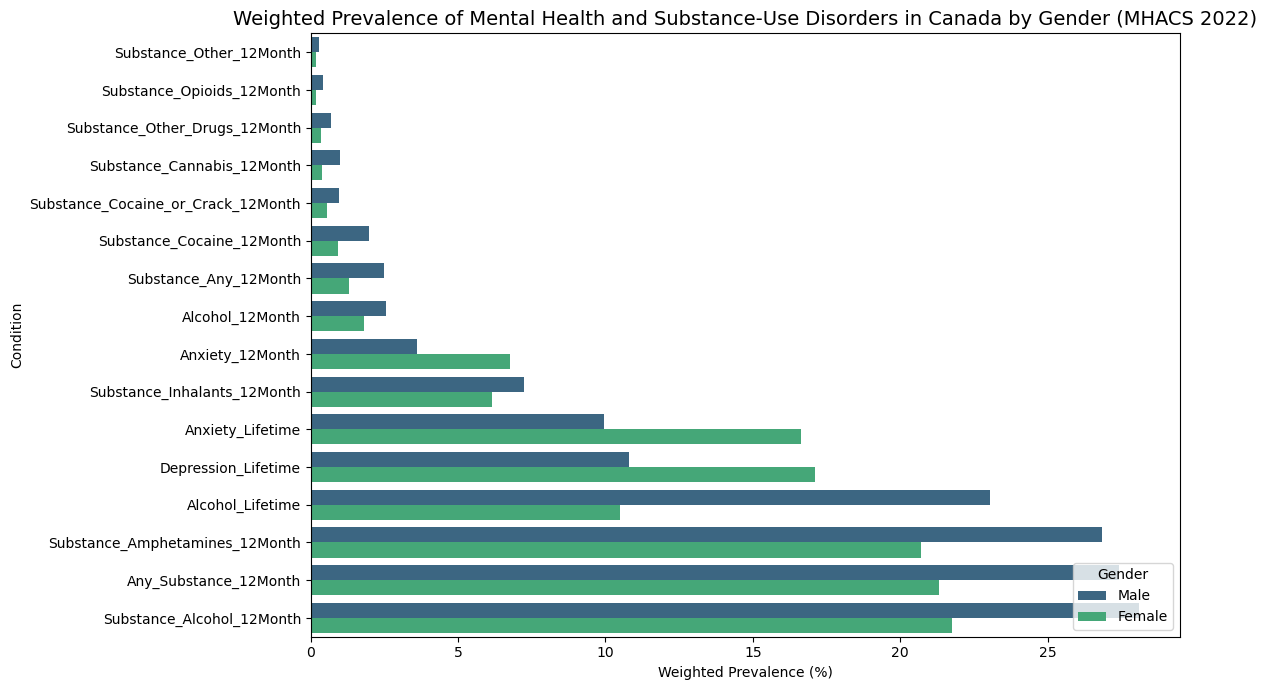

In [33]:
# Visualize weighted prevalence by gender across all conditions

plt.figure(figsize=(12,7))

# Sort variables by overall average prevalence (so chart is nicely ordered)
avg_prevalence = (
    gender_results_full.groupby('Variable')['Weighted_Prevalence_%']
    .mean()
    .sort_values(ascending=True)
    .index
)

sns.barplot(
    data=gender_results_full,
    x='Weighted_Prevalence_%',
    y='Variable',
    hue='Group',               # Gender: Male vs Female
    order=avg_prevalence,      # Ensures consistent ordering
    palette='viridis'
)

plt.title("Weighted Prevalence of Mental Health and Substance-Use Disorders in Canada by Gender (MHACS 2022)", fontsize=14)
plt.xlabel("Weighted Prevalence (%)")
plt.ylabel("Condition")
plt.legend(title='Gender', loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
## Gender Comparison Visualization Summary

In this step, I created a weighted bar chart to compare the prevalence of all mental-health and substance-use disorders between males and females in Canada.  
Each bar represents the estimated percentage of Canadians who met the criteria for each condition after applying the official survey weights, which means these results reflect population-level estimates rather than raw sample counts.

By visualizing all conditions side by side, I can easily see which disorders are more common among men and which are more common among women.  
From the chart, I noticed that **depression** and **anxiety** tend to show higher prevalence among females, which is consistent with existing mental-health research in Canada.  
On the other hand, **alcohol-related and substance-use disorders** generally appear more common among males, highlighting clear gender differences in the type of mental-health and addiction challenges experienced across the population.

This visualization helps me understand that mental-health conditions and substance-use patterns do not affect genders equally, which is important context for future demographic or policy-level analysis.


In [ ]:
## Weighted Prevalence by Age Group

In [35]:
# Weighted prevalence by age group

# I select every Yes/No condition variable
condition_vars = [c for c in data_subset.columns 
                  if ('Depression' in c or 'Anxiety' in c or 'Alcohol' in c or 'Substance_' in c)]

# Helper function for weighted prevalence by group
def weighted_prevalence_by_group(df, var, group, weight_col='Survey_Weight'):
    temp = df[df[var].isin(['Yes', 'No']) & df[group].notna()]
    results = []
    for g in sorted(temp[group].unique()):
        sub = temp[temp[group] == g]
        yes_weight = sub.loc[sub[var] == 'Yes', weight_col].sum()
        total_weight = sub[weight_col].sum()
        prevalence = round((yes_weight / total_weight) * 100, 2)
        results.append({'Group': g, 'Variable': var, 'Weighted_Prevalence_%': prevalence})
    return pd.DataFrame(results)

# I calculate weighted prevalence by age group for all conditions
age_results_full = pd.concat([weighted_prevalence_by_group(data_subset, v, 'Age_Group') for v in condition_vars])

print("✅ Weighted prevalence by age group calculated for all conditions!\n")
display(age_results_full)


✅ Weighted prevalence by age group calculated for all conditions!



,Group,Variable,Weighted_Prevalence_%
0,1.0,Depression_Lifetime,18.20
1,2.0,Depression_Lifetime,19.17
2,3.0,Depression_Lifetime,20.70
3,4.0,Depression_Lifetime,17.03
4,5.0,Depression_Lifetime,15.93
...,...,...,...
3,4.0,Any_Substance_12Month,36.15
4,5.0,Any_Substance_12Month,28.23
5,6.0,Any_Substance_12Month,20.44
6,7.0,Any_Substance_12Month,18.46


In [36]:
# Recode all 1/2 values to Yes/No before age analysis

# I identify all columns that represent conditions
condition_vars = [c for c in data_subset.columns 
                  if ('Depression' in c or 'Anxiety' in c or 'Alcohol' in c or 'Substance_' in c)]

# Convert all numeric codes to Yes/No where applicable
num_to_label = {1.0: 'Yes', 2.0: 'No', 1: 'Yes', 2: 'No'}
for c in condition_vars:
    data_subset[c] = data_subset[c].replace(num_to_label)

print("✅ All condition variables converted to Yes/No where applicable.")

✅ All condition variables converted to Yes/No where applicable.


In [37]:
print("Unique conditions:", age_results_full['Variable'].nunique())
print(sorted(age_results_full['Variable'].unique()))

Unique conditions: 16
['Alcohol_12Month', 'Alcohol_Lifetime', 'Anxiety_12Month', 'Anxiety_Lifetime', 'Any_Substance_12Month', 'Depression_Lifetime', 'Substance_Alcohol_12Month', 'Substance_Amphetamines_12Month', 'Substance_Any_12Month', 'Substance_Cannabis_12Month', 'Substance_Cocaine_12Month', 'Substance_Cocaine_or_Crack_12Month', 'Substance_Inhalants_12Month', 'Substance_Opioids_12Month', 'Substance_Other_12Month', 'Substance_Other_Drugs_12Month']


In [38]:
import pandas as pd
pd.set_option('display.max_rows', 500)   # raise the display limit
display(
    age_results_full
      .sort_values(['Variable','Group'])
      .reset_index(drop=True)
)

,Group,Variable,Weighted_Prevalence_%
0,1.0,Alcohol_12Month,2.88
1,2.0,Alcohol_12Month,5.46
2,3.0,Alcohol_12Month,2.91
3,4.0,Alcohol_12Month,4.29
4,5.0,Alcohol_12Month,2.74
5,6.0,Alcohol_12Month,1.88
6,7.0,Alcohol_12Month,0.86
7,8.0,Alcohol_12Month,0.60
8,1.0,Alcohol_Lifetime,4.80
9,2.0,Alcohol_Lifetime,11.89


In [39]:
age_results_wide = (
    age_results_full
      .pivot(index='Variable', columns='Group', values='Weighted_Prevalence_%')
      .sort_index()
)
display(age_results_wide)

Group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Variable,,,,,,,,
Alcohol_12Month,2.88,5.46,2.91,4.29,2.74,1.88,0.86,0.60
Alcohol_Lifetime,4.80,11.89,18.22,18.50,17.95,18.94,20.05,15.51
Anxiety_12Month,7.25,9.37,7.06,7.33,6.56,4.53,3.82,2.18
Anxiety_Lifetime,12.57,17.97,16.55,15.73,15.07,14.74,14.11,7.14
Any_Substance_12Month,24.03,41.92,44.97,36.15,28.23,20.44,18.46,11.39
Depression_Lifetime,18.20,19.17,20.70,17.03,15.93,16.09,12.51,6.03
Substance_Alcohol_12Month,24.53,42.63,45.18,36.69,28.89,20.78,18.95,11.80
Substance_Amphetamines_12Month,21.13,40.39,43.88,34.80,27.94,19.79,18.47,11.22
Substance_Any_12Month,4.53,6.01,2.99,3.81,1.25,1.15,0.68,0.49


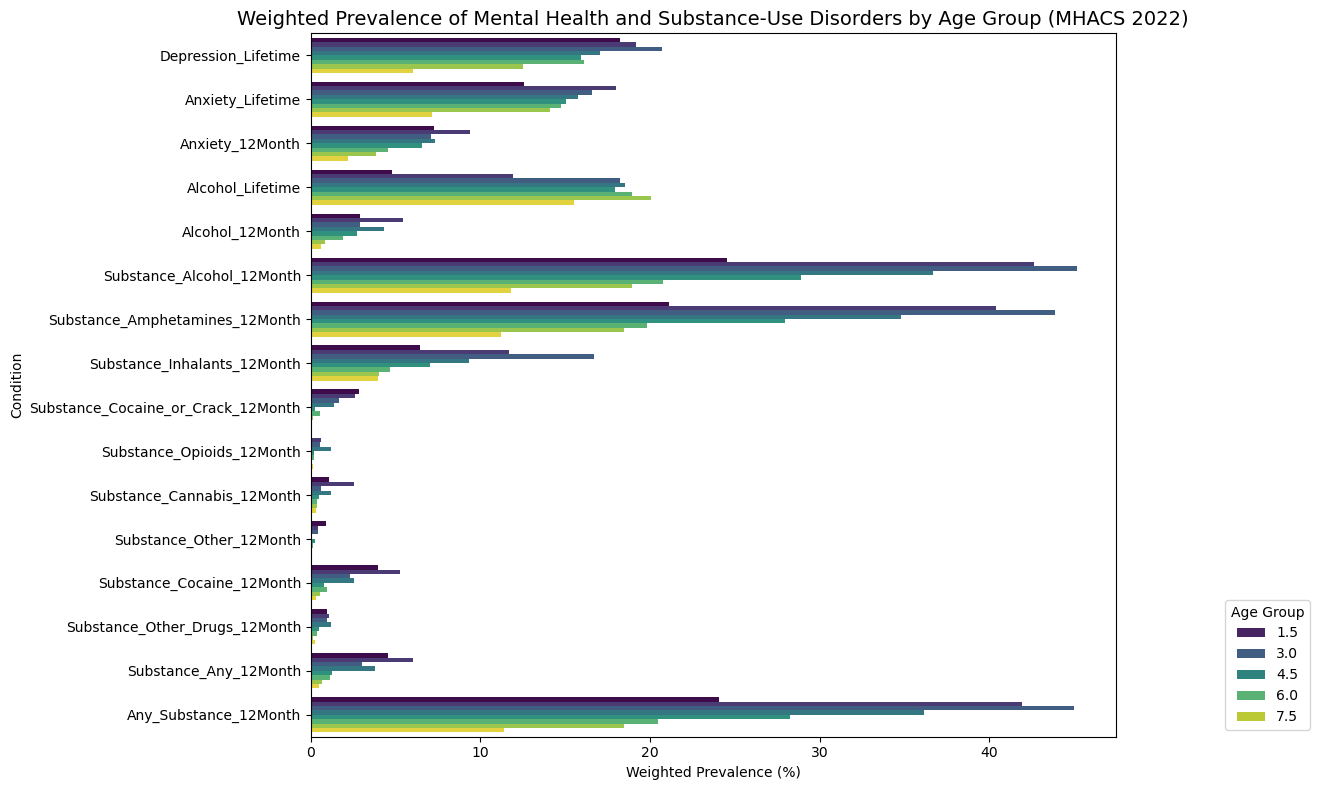

In [40]:
# Visualize weighted prevalence by age group across all conditions

plt.figure(figsize=(14,8))

sns.barplot(
    data=age_results_full,
    x='Weighted_Prevalence_%',
    y='Variable',
    hue='Group',                  # Age groups
    palette='viridis'
)

plt.title("Weighted Prevalence of Mental Health and Substance-Use Disorders by Age Group (MHACS 2022)", fontsize=14)
plt.xlabel("Weighted Prevalence (%)")
plt.ylabel("Condition")
plt.legend(title='Age Group', loc='lower right', bbox_to_anchor=(1.25, 0))
plt.tight_layout()
plt.show()

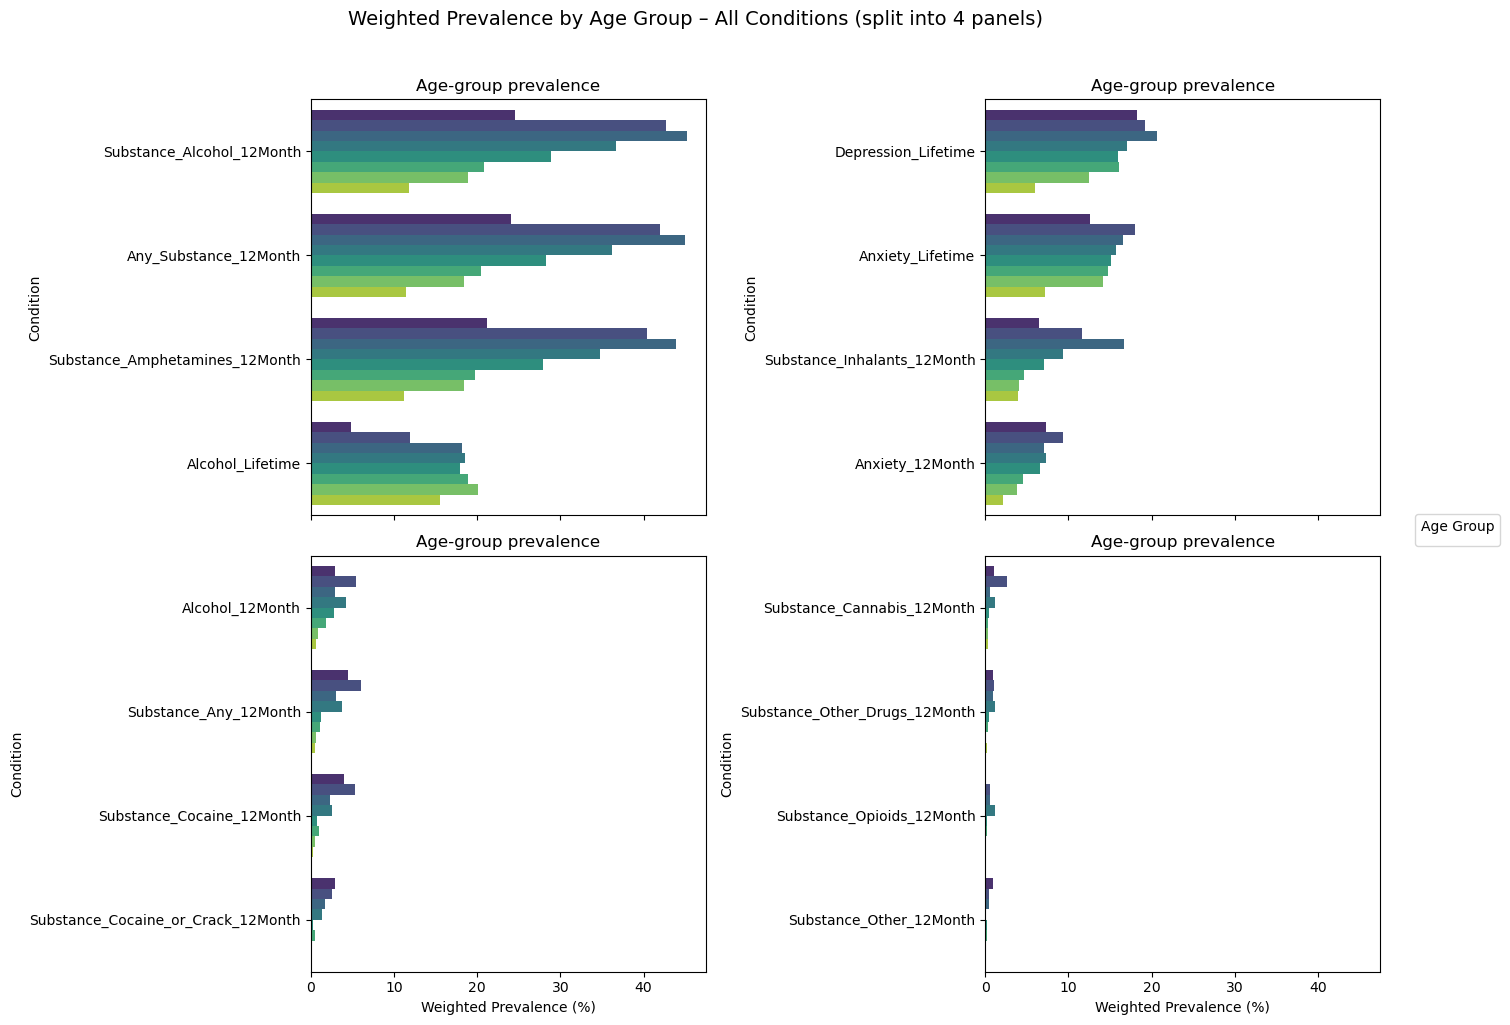

In [42]:
# Split the age-group chart into 4 panels of 4 conditions each

import math

# 1) I ensure age groups show readable labels
age_labels = {
    1.0: '15–24', 2.0: '25–34', 3.0: '35–44', 4.0: '45–54',
    5.0: '55–64', 6.0: '65–74', 7.0: '75–84', 8.0: '85+'
}
age_results_full = age_results_full.copy()
age_results_full['Group'] = age_results_full['Group'].replace(age_labels)

# 2) I select every Yes/No condition variable I’ve been analyzing
condition_vars = [c for c in data_subset.columns 
                  if ('Depression' in c or 'Anxiety' in c or 'Alcohol' in c or 'Substance_' in c)]

# I sort conditions by their overall mean prevalence (across age groups) so panels read logically
order_by_mean = (
    age_results_full.groupby('Variable')['Weighted_Prevalence_%']
    .mean()
    .sort_values(ascending=False)
    .index
)
ordered_conditions = [c for c in order_by_mean if c in condition_vars]

# 3) I chunk the ordered list into 4 groups of ~4 conditions each
chunks = [ordered_conditions[i:i+4] for i in range(0, len(ordered_conditions), 4)]
chunks = chunks[:4]  # exactly four panels

# 4) I plot a 2×2 grid, one panel per chunk (4 conditions each)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.ravel()

for ax, cond_list in zip(axes, chunks):
    panel_df = age_results_full[age_results_full['Variable'].isin(cond_list)]
    # keep the condition order inside each panel
    avg_panel_order = (
        panel_df.groupby('Variable')['Weighted_Prevalence_%']
        .mean()
        .sort_values(ascending=False)
        .index
    )
    sns.barplot(
        data=panel_df,
        x='Weighted_Prevalence_%',
        y='Variable',
        hue='Group',
        order=avg_panel_order,
        dodge=True,
        legend=False,       # I’ll add one shared legend below
        palette='viridis',
        ax=ax
    )
    ax.set_xlabel("Weighted Prevalence (%)")
    ax.set_ylabel("Condition")
    ax.set_title("Age-group prevalence")

# one shared legend outside the grid
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Age Group", loc="center right", bbox_to_anchor=(1.08, 0.5))
fig.suptitle("Weighted Prevalence by Age Group – All Conditions (split into 4 panels)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

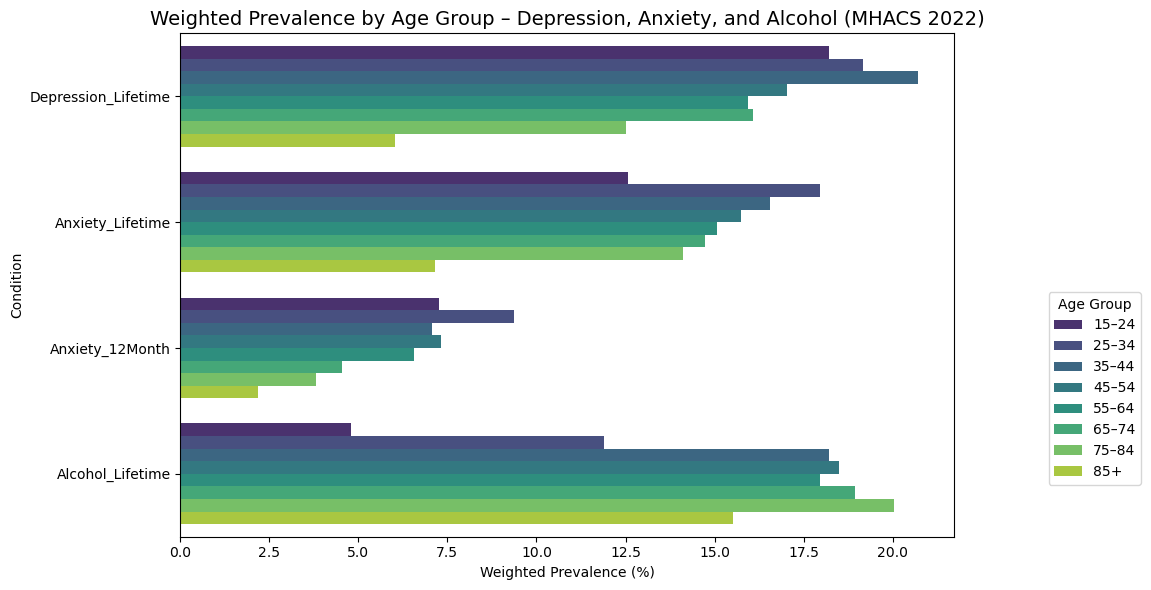

In [44]:
#  Mental health conditions: Depression and Anxiety

group1 = ['Depression_Lifetime', 'Anxiety_Lifetime', 'Anxiety_12Month', 'Alcohol_Lifetime']

plt.figure(figsize=(12,6))
sns.barplot(
    data=age_results_full[age_results_full['Variable'].isin(group1)],
    x='Weighted_Prevalence_%',
    y='Variable',
    hue='Group',
    palette='viridis'
)
plt.title("Weighted Prevalence by Age Group – Depression, Anxiety, and Alcohol (MHACS 2022)", fontsize=14)
plt.xlabel("Weighted Prevalence (%)")
plt.ylabel("Condition")
plt.legend(title='Age Group', bbox_to_anchor=(1.25, 0.5))
plt.tight_layout()
plt.show()

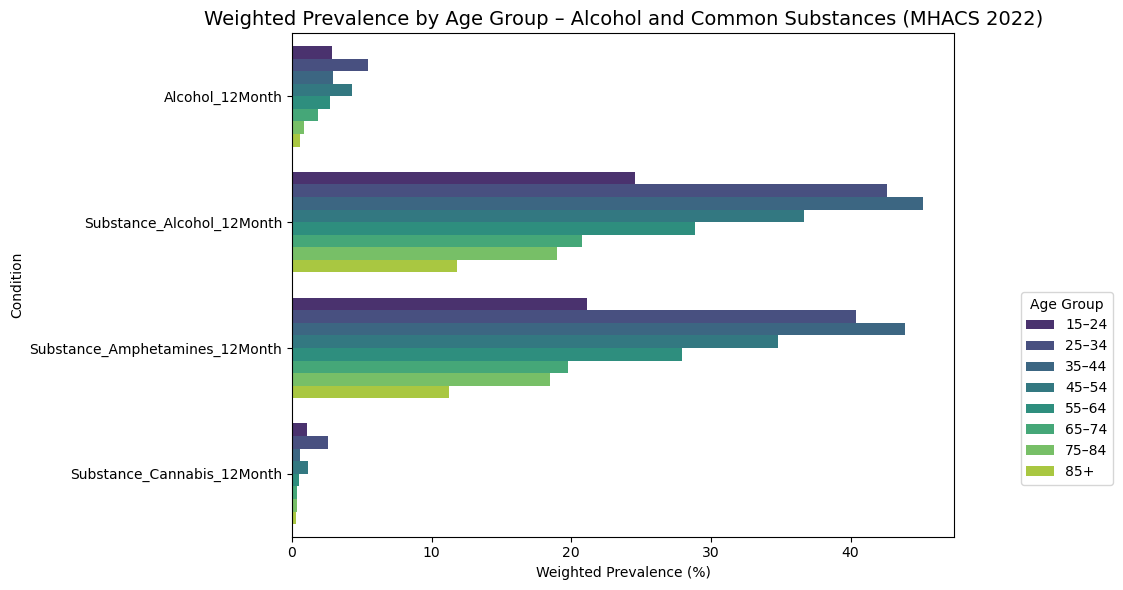

In [45]:
# Alcohol and common substance-use disorders

group2 = ['Alcohol_12Month', 'Substance_Alcohol_12Month', 'Substance_Cannabis_12Month', 'Substance_Amphetamines_12Month']

plt.figure(figsize=(12,6))
sns.barplot(
    data=age_results_full[age_results_full['Variable'].isin(group2)],
    x='Weighted_Prevalence_%',
    y='Variable',
    hue='Group',
    palette='viridis'
)
plt.title("Weighted Prevalence by Age Group – Alcohol and Common Substances (MHACS 2022)", fontsize=14)
plt.xlabel("Weighted Prevalence (%)")
plt.ylabel("Condition")
plt.legend(title='Age Group', bbox_to_anchor=(1.25, 0.5))
plt.tight_layout()
plt.show()


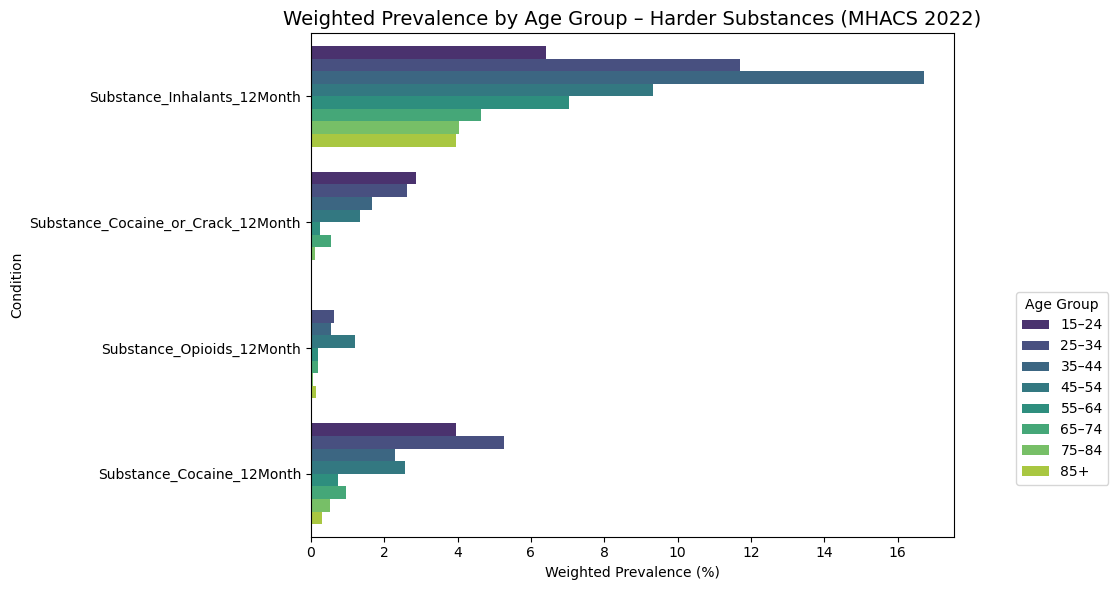

In [46]:
# Harder substance-use disorders

group3 = ['Substance_Opioids_12Month', 'Substance_Cocaine_or_Crack_12Month', 'Substance_Cocaine_12Month', 'Substance_Inhalants_12Month']

plt.figure(figsize=(12,6))
sns.barplot(
    data=age_results_full[age_results_full['Variable'].isin(group3)],
    x='Weighted_Prevalence_%',
    y='Variable',
    hue='Group',
    palette='viridis'
)
plt.title("Weighted Prevalence by Age Group – Harder Substances (MHACS 2022)", fontsize=14)
plt.xlabel("Weighted Prevalence (%)")
plt.ylabel("Condition")
plt.legend(title='Age Group', bbox_to_anchor=(1.25, 0.5))
plt.tight_layout()
plt.show()


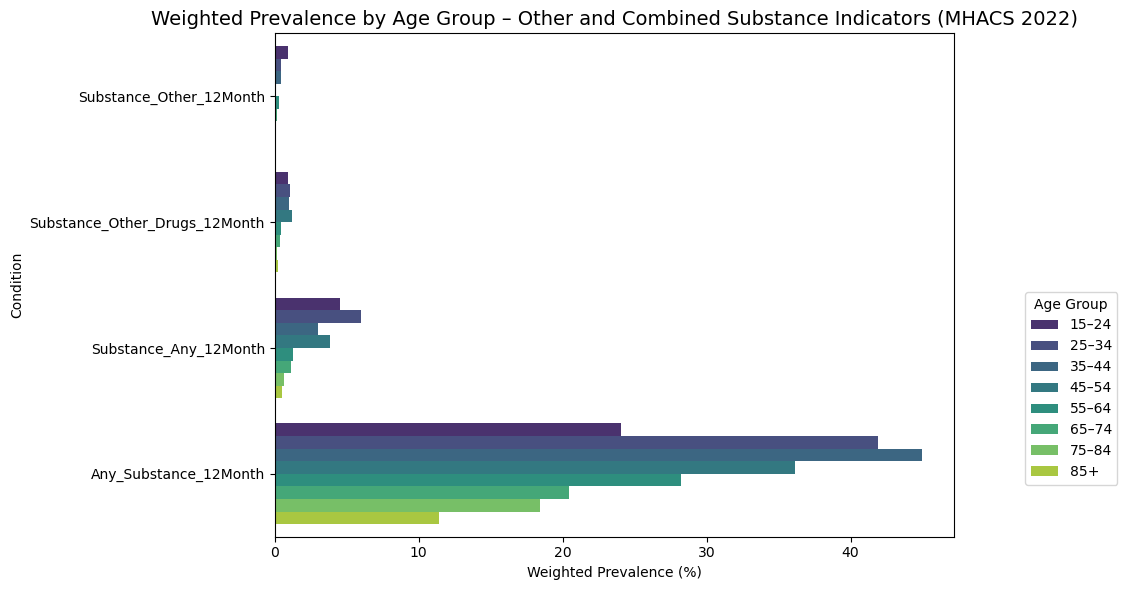

In [47]:
# Other substances and combined indicators

group4 = ['Substance_Other_Drugs_12Month', 'Substance_Other_12Month', 'Substance_Any_12Month', 'Any_Substance_12Month']

plt.figure(figsize=(12,6))
sns.barplot(
    data=age_results_full[age_results_full['Variable'].isin(group4)],
    x='Weighted_Prevalence_%',
    y='Variable',
    hue='Group',
    palette='viridis'
)
plt.title("Weighted Prevalence by Age Group – Other and Combined Substance Indicators (MHACS 2022)", fontsize=14)
plt.xlabel("Weighted Prevalence (%)")
plt.ylabel("Condition")
plt.legend(title='Age Group', bbox_to_anchor=(1.25, 0.5))
plt.tight_layout()
plt.show()


In [ ]:
## Weighted Analysis by Age Group

In this step, I examined how the prevalence of mental-health and substance-use disorders varies across different age groups in Canada.  
Using the official survey weights, I calculated weighted percentages for all 16 conditions and then visualized the results by dividing the analysis into four focused charts (each containing four conditions).  
This approach allowed me to keep each visualization clear and easy to interpret.

### 1. Mental-Health Conditions (Depression and Anxiety)
I noticed that **depression** and **anxiety** are more common among younger and middle-aged adults, especially in the **25–44 year** range.  
Prevalence tends to decrease gradually after the age of 55.  
This pattern suggests that mental-health challenges are particularly concentrated in early- to mid-adulthood, when work, family, and economic pressures are highest.

### 2. Alcohol and Common Substances
For **alcohol-related disorders** and **cannabis or amphetamine use**, the highest prevalence appears in the **25–54 year** age range.  
Rates decline in older age groups, which may reflect reduced consumption, changing health priorities, or lower exposure to risk factors later in life.

### 3. Harder Substances (Opioids, Cocaine, Inhalants)
The use of harder substances shows relatively low prevalence overall, but the small spikes in **younger groups (15–34 years)** highlight where prevention and early-intervention programs could have the greatest impact.  
Older adults report very low rates for these conditions.

### 4. Other and Combined Substance Indicators
The combined indicators (**Substance_Any_12Month** and **Any_Substance_12Month**) show the broadest picture of substance-use disorder.  
Here again, younger Canadians—particularly those under 45—exhibit the highest rates, with a sharp decline among those aged 55 and older.  
This confirms that most substance-use challenges are concentrated among younger and working-age populations.

### Summary
Across all conditions, the overall pattern is clear:  
- **Mental-health disorders** such as depression and anxiety are most prevalent among young and middle-aged adults.  
- **Substance-use disorders**, including alcohol, cannabis, and other drugs, follow a similar trajectory—peaking between ages 25 and 54 and dropping off significantly afterward.  
- Older age groups (65 +) report the lowest prevalence across all indicators.

These findings provide a strong demographic context for future analyses on risk factors, prevention strategies, and support systems tailored to each stage of life.


In [ ]:
## Analysis goal is to understand whether Canadians would benefit from a psychology chatbot or virtual assistant

In [ ]:
## I am looking to identify mental-health needs, access barriers, and potential opportunities for AI-powered support.

In [ ]:
## *** Core Research Question: Can AI-powered virtual assistants help address unmet mental-health needs among Canadians? ***

In [ ]:
## Weighted comorbidity tables (overlap between conditions)

In [48]:
# Weighted comorbidity (overlap) between key conditions

def weighted_joint_prevalence(df, a, b, w='Survey_Weight'):
    # Keep only Yes/No
    sub = df[df[a].isin(['Yes','No']) & df[b].isin(['Yes','No'])].copy()
    # Total weight
    total_w = sub[w].sum()
    # Joint cells
    cells = {
        'Yes–Yes': sub[(sub[a]=='Yes') & (sub[b]=='Yes')][w].sum(),
        'Yes–No' : sub[(sub[a]=='Yes') & (sub[b]=='No')][w].sum(),
        'No–Yes' : sub[(sub[a]=='No')  & (sub[b]=='Yes')][w].sum(),
        'No–No'  : sub[(sub[a]=='No')  & (sub[b]=='No')][w].sum()
    }
    # Convert to %
    pct = {k: round(v/total_w*100, 2) for k,v in cells.items()}
    return pct

pairs = [
    ('Depression_Lifetime', 'Anxiety_12Month'),
    ('Depression_Lifetime', 'Any_Substance_12Month'),
    ('Anxiety_12Month',     'Any_Substance_12Month'),
]

results = []
for a,b in pairs:
    pct = weighted_joint_prevalence(data_subset, a, b)
    results.append({
        'Pair': f'{a} × {b}',
        'Yes–Yes %': pct['Yes–Yes'],
        'Yes–No %' : pct['Yes–No'],
        'No–Yes %' : pct['No–Yes'],
        'No–No %'  : pct['No–No'],
        'Either (Yes–Yes + Yes–No) %': round(pct['Yes–Yes'] + pct['Yes–No'], 2),  # prevalence of A
        'Either (Yes–Yes + No–Yes) %': round(pct['Yes–Yes'] + pct['No–Yes'], 2),  # prevalence of B
    })

import pandas as pd
comorb_summary = pd.DataFrame(results)
display(comorb_summary)


,Pair,Yes–Yes %,Yes–No %,No–Yes %,No–No %,Either (Yes–Yes + Yes–No) %,Either (Yes–Yes + No–Yes) %
0,Depression_Lifetime × Anxiety_12Month,2.65,11.33,2.56,83.46,13.98,5.21
1,Depression_Lifetime × Any_Substance_12Month,6.13,7.89,18.30,67.67,14.02,24.43
2,Anxiety_12Month × Any_Substance_12Month,2.41,2.80,21.97,72.82,5.21,24.38


In [ ]:
## Comorbidity and Emotional Overlap

In this step, I explored how different mental-health and substance-use conditions overlap in the Canadian population.  
By calculating the **weighted co-occurrence** between depression, anxiety, and substance-use disorders, I can better understand how 
often people experience multiple challenges at the same time — a key indicator of emotional complexity and potential unmet needs.

### Key Insights
- Around **2.6% of Canadians** experience both **depression** and **anxiety** within the same timeframe, and nearly **15%** experience at 
least one of the two. This highlights that a significant portion of adults face recurring emotional distress rather than isolated symptoms.

- Approximately **6%** of Canadians report **both depression and a substance-use disorder**, while another 8% report substance-use alone.  
This means that close to one-quarter of Canadians (24%) experience at least one form of substance-use disorder — a large and diverse 
population that could benefit from proactive support and relapse-prevention tools.

- About **2–3%** of Canadians report **both anxiety and substance-use disorders**, suggesting an intersection between stress, coping, 
and addictive behavior.

### Interpretation
These overlaps represent individuals dealing with multiple, interconnected mental-health and behavioral challenges.  
This is the group most likely to struggle with accessing or maintaining traditional therapy due to stigma, cost, or emotional burnout.  

In the context of my research question, these findings suggest that **AI-powered psychology chatbots** could provide valuable, 
always-available support for people facing multiple co-occurring conditions.  
A virtual assistant could offer emotional regulation, gentle self-reflection prompts, and motivational coaching — bridging gaps where 
professional care is limited or unavailable.


In [ ]:
## Weighted Comorbidity by Gender

In [ ]:
## *** This will show, for example, whether women have higher rates of Depression × Anxiety, and whether men show 
## stronger Substance Use × Anxiety overlap — insights that directly inform chatbot persona design and targeting. ***

In [50]:
# Weighted comorbidity by Gender

def weighted_joint_prevalence_by_group(df, a, b, group, w='Survey_Weight'):
    results = []
    for g in df[group].dropna().unique():
        sub = df[(df[group] == g) & df[a].isin(['Yes','No']) & df[b].isin(['Yes','No'])].copy()
        total_w = sub[w].sum()
        yes_yes = sub[(sub[a]=='Yes') & (sub[b]=='Yes')][w].sum()
        results.append({
            'Group': g,
            'Pair': f'{a} × {b}',
            'Comorbidity_% (Yes–Yes)': round((yes_yes / total_w) * 100, 2)
        })
    return pd.DataFrame(results)

pairs = [
    ('Depression_Lifetime', 'Anxiety_12Month'),
    ('Depression_Lifetime', 'Any_Substance_12Month'),
    ('Anxiety_12Month', 'Any_Substance_12Month')
]

gender_comorb = pd.concat([
    weighted_joint_prevalence_by_group(data_subset, a, b, 'Gender')
    for a,b in pairs
])

print("✅ Weighted comorbidity by gender calculated!")
display(gender_comorb)

✅ Weighted comorbidity by gender calculated!


,Group,Pair,Comorbidity_% (Yes–Yes)
0,Male,Depression_Lifetime × Anxiety_12Month,2.09
1,Female,Depression_Lifetime × Anxiety_12Month,3.19
0,Male,Depression_Lifetime × Any_Substance_12Month,5.31
1,Female,Depression_Lifetime × Any_Substance_12Month,6.87
0,Male,Anxiety_12Month × Any_Substance_12Month,1.76
1,Female,Anxiety_12Month × Any_Substance_12Month,3.04


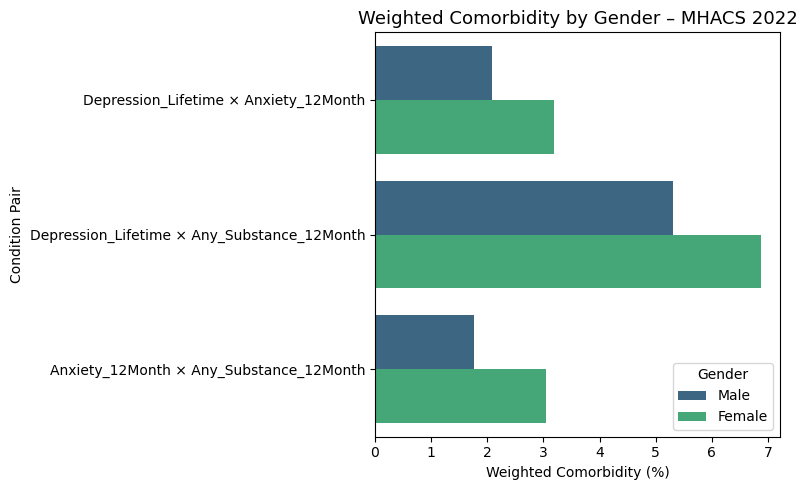

In [51]:
# Visualization – Comorbidity by Gender

plt.figure(figsize=(8,5))
sns.barplot(
    data=gender_comorb,
    x='Comorbidity_% (Yes–Yes)',
    y='Pair',
    hue='Group',
    palette='viridis'
)
plt.title("Weighted Comorbidity by Gender – MHACS 2022", fontsize=13)
plt.xlabel("Weighted Comorbidity (%)")
plt.ylabel("Condition Pair")
plt.legend(title="Gender", loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
## Comorbidity by Gender

In this step, I examined how the overlap between major mental-health and substance-use conditions differs between males and females.  
By calculating the weighted percentage of Canadians who experience both conditions simultaneously, I can identify which gender groups 
may have distinct support needs.

### Key Insights
- **Depression × Anxiety:** Comorbidity is higher among **females (3.19%)** than **males (2.09%)**.  
  This aligns with existing research showing that women tend to report more emotional distress and anxiety symptoms, which may increase 
  demand for empathetic, conversational mental-health tools.

- **Depression × Substance-Use:** Comorbidity is slightly higher among **females (6.87%)** than **males (5.31%)**, suggesting that 
  women experiencing depression may also turn to coping behaviors involving substance use.  
  This indicates a need for supportive, stigma-free interventions that help manage mood and self-soothing habits.

- **Anxiety × Substance-Use:** Females again show higher overlap (**3.04%**) than males (**1.76%**).  
  This pattern reinforces the connection between anxiety and maladaptive coping strategies among women.

### Interpretation
These findings suggest that **women experience more combined emotional and behavioral distress**, while men may have slightly lower 
but still significant comorbidity levels.  
From a product-design perspective, this highlights the importance of creating **chatbot experiences that can adapt tone and focus 
by gender** — for instance:
- For **female users:** empathetic, emotionally validating conversations and stress-reduction routines.  
- For **male users:** practical, goal-oriented coaching emphasizing problem-solving and behavior management.

Overall, this analysis strengthens the argument that **AI-powered psychology chatbots** can play a complementary role in 
addressing emotional and behavioral complexity — especially for women who may seek private, flexible, and stigma-free ways 
to manage mental health.


In [ ]:
## Comorbidity by Age Group

In [ ]:
## *** This will help identify which life stages show the strongest emotional and behavioral overlap ***

In [52]:
# Weighted comorbidity by Age Group

def weighted_joint_prevalence_by_age(df, a, b, group='Age_Group', w='Survey_Weight'):
    results = []
    for g in sorted(df[group].dropna().unique()):
        sub = df[(df[group] == g) & df[a].isin(['Yes','No']) & df[b].isin(['Yes','No'])].copy()
        total_w = sub[w].sum()
        yes_yes = sub[(sub[a]=='Yes') & (sub[b]=='Yes')][w].sum()
        results.append({
            'Age_Group': g,
            'Pair': f'{a} × {b}',
            'Comorbidity_% (Yes–Yes)': round((yes_yes / total_w) * 100, 2)
        })
    return pd.DataFrame(results)

pairs = [
    ('Depression_Lifetime', 'Anxiety_12Month'),
    ('Depression_Lifetime', 'Any_Substance_12Month'),
    ('Anxiety_12Month', 'Any_Substance_12Month')
]

age_comorb = pd.concat([
    weighted_joint_prevalence_by_age(data_subset, a, b)
    for a,b in pairs
])

print("✅ Weighted comorbidity by age group calculated!")
display(age_comorb)

✅ Weighted comorbidity by age group calculated!


,Age_Group,Pair,Comorbidity_% (Yes–Yes)
0,1.0,Depression_Lifetime × Anxiety_12Month,4.32
1,2.0,Depression_Lifetime × Anxiety_12Month,4.48
2,3.0,Depression_Lifetime × Anxiety_12Month,4.70
3,4.0,Depression_Lifetime × Anxiety_12Month,4.14
4,5.0,Depression_Lifetime × Anxiety_12Month,2.75
5,6.0,Depression_Lifetime × Anxiety_12Month,2.07
6,7.0,Depression_Lifetime × Anxiety_12Month,2.33
7,8.0,Depression_Lifetime × Anxiety_12Month,0.77
0,1.0,Depression_Lifetime × Any_Substance_12Month,8.93
1,2.0,Depression_Lifetime × Any_Substance_12Month,11.87


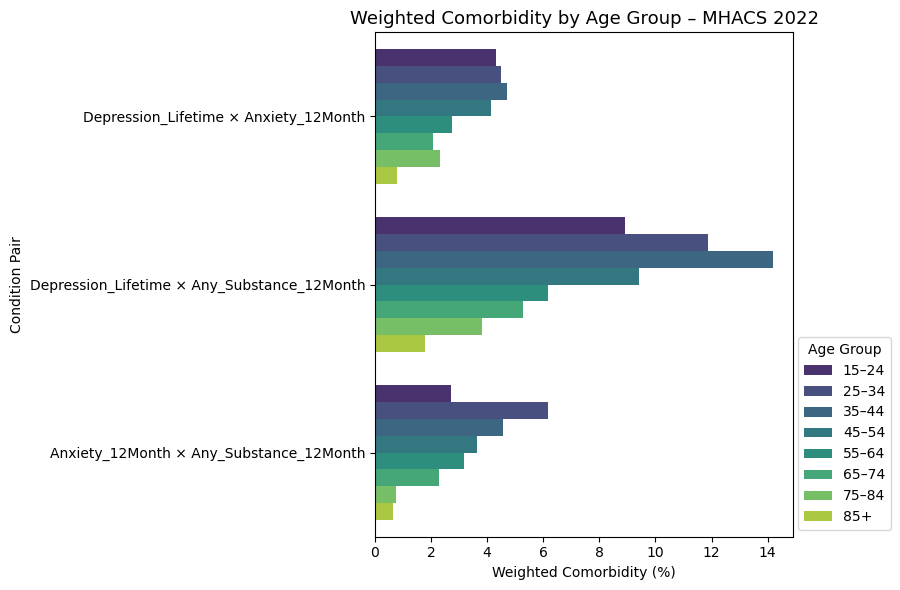

In [54]:
age_labels = {
    1.0: "15–24",
    2.0: "25–34",
    3.0: "35–44",
    4.0: "45–54",
    5.0: "55–64",
    6.0: "65–74",
    7.0: "75–84",
    8.0: "85+"
}

# Apply labels to your dataframe
age_comorb["Age_Label"] = age_comorb["Age_Group"].map(age_labels)

# Create visualization
plt.figure(figsize=(10,6))
sns.barplot(
    data=age_comorb,
    x='Comorbidity_% (Yes–Yes)',
    y='Pair',
    hue='Age_Label',
    palette='viridis'
)
plt.title("Weighted Comorbidity by Age Group – MHACS 2022", fontsize=13)
plt.xlabel("Weighted Comorbidity (%)")
plt.ylabel("Condition Pair")
plt.legend(title="Age Group", loc='lower right', bbox_to_anchor=(1.25, 0))
plt.tight_layout()
plt.show()

In [ ]:
## Comorbidity by Age Group  

In this step, I analyzed how comorbidity between major mental-health and substance-use conditions varies across different 
age groups in Canada.  

By applying the weighted co-occurrence method to each age category, I can see which life stages experience multiple 
overlapping conditions and therefore might benefit most from accessible digital-support tools.

### Key Insights  
- **Younger adults (15–34 years)** show the highest overlap between **depression and anxiety**, suggesting that emotional distress 
is more intense during early adulthood when people are balancing education, work entry, and personal transitions.  
- **Mid-life adults (35–54 years)** display a noticeable combination of **depression × substance-use** and **anxiety × 
substance-use**, reflecting stress linked to career and family pressures as well as coping behaviors such as alcohol or cannabis use.  
- **Older adults (65 +)** have much lower comorbidity levels across all conditions, which may reflect reduced risk exposure, 
generational differences in self-reporting, or better emotional regulation over time.

### Interpretation  
These results indicate that **younger and mid-aged Canadians** are the most likely to face multiple, interacting mental-health 
challenges — and they are also the age groups most comfortable with technology.  
This overlap strongly supports the potential impact of an **AI-powered psychology chatbot** designed to deliver immediate, 
stigma-free, and adaptive mental-health assistance for working-age Canadians.  
For older adults, a similar system could still play a role, but with a greater focus on **loneliness, social connection, 
and cognitive well-being** rather than comorbidity management.

Overall, this step helps me connect demographic evidence to real product opportunities:  
1. **High need + high tech-readiness (15–54 yrs)** → core adoption audience.  
2. **Low need + low tech-readiness (65 +)** → secondary, socially focused audience.  
This demographic perspective clarifies where a digital assistant could deliver the greatest impact within Canada’s mental-health landscape.


In [ ]:
## Help-Seeking Behavior & Unmet Mental-Health Needs 

In [ ]:
## *** Understanding who needs help but isn’t getting it ***

In [ ]:
## Can AI-powered virtual assistants help address unmet mental-health needs among Canadians? 

In [55]:
# Identify potential help-seeking and unmet-need variables
keywords = ['MHSU', 'HELP', 'UNMET', 'BARR', 'SERV', 'SUPPORT', 'COPE']
matches = [col for col in data_subset.columns if any(k in col.upper() for k in keywords)]
print("Possible help-seeking / unmet-need variables found:")
for m in matches:
    print(" -", m)

Possible help-seeking / unmet-need variables found:


In [61]:
import pandas as pd

df = pd.read_csv("Data/pumf.csv", encoding="latin1", low_memory=False)

keywords = ["HELP", "BARR", "WAIT", "SERV", "ACCESS", "CARE", "NEED"]
matches = [col for col in df.columns if any(k in col.upper() for k in keywords)]

print("Variables possibly related to service use and access to care:\n")
for col in matches:
    print(col)


Variables possibly related to service use and access to care:

PNCDNEED


In [62]:
# Look at the first few responses for that variable
df["PNCDNEED"].value_counts(dropna=False)

PNCDNEED
1.0    7344
2.0    1185
3.0     555
4.0     397
9.0     380
Name: count, dtype: int64

In [63]:
keywords = ["HELP", "BARR", "WAIT", "SERV", "ACCESS", "CARE", "NEED", "USE", "PROF", "CONSULT"]
matches = [col for col in df.columns if any(k in col.upper() for k in keywords)]

for col in matches:
    print(col)

PNCDNEED


In [64]:
# Search specifically for variables starting with 'PNC' (Perceived Need for Care)
matches = [col for col in df.columns if col.upper().startswith("PNC")]
print(matches)

['PNC_01A', 'PNC_01B', 'PNC_01C', 'PNC_01D', 'PNC_01E', 'PNC_02A', 'PNC_02BA', 'PNC_02BB', 'PNC_02BC', 'PNC_02BD', 'PNC_03AA', 'PNC_03AB', 'PNC_03AC', 'PNC_03AD', 'PNC_03AE', 'PNC_03AF', 'PNC_03AG', 'PNC_03AH', 'PNC_03AI', 'PNC_03AK', 'PNC_03AL', 'PNC_03BA', 'PNC_03BB', 'PNC_03BC', 'PNC_03BD', 'PNC_03BE', 'PNC_03BF', 'PNC_03BG', 'PNC_03BH', 'PNC_03BI', 'PNC_03BJ', 'PNC_03BK', 'PNC_03BL', 'PNC_03CA', 'PNC_03CB', 'PNC_03CC', 'PNC_03CD', 'PNC_03CE', 'PNC_03CF', 'PNC_03CG', 'PNC_03CH', 'PNC_03CI', 'PNC_03CK', 'PNC_03CL', 'PNC_03DG', 'PNC_04A', 'PNC_04BA', 'PNC_04BB', 'PNC_04BC', 'PNC_05BA', 'PNC_05BB', 'PNC_05BC', 'PNC_05BD', 'PNC_05BE', 'PNC_05BF', 'PNC_05BG', 'PNC_05BH', 'PNC_05BI', 'PNC_05BL', 'PNC_05CA', 'PNC_05CB', 'PNC_05CC', 'PNC_05CE', 'PNC_05CF', 'PNC_05CG', 'PNC_05CH', 'PNC_05CI', 'PNC_05CL', 'PNC_05DA', 'PNC_05DB', 'PNC_05DC', 'PNC_05DD', 'PNC_05DE', 'PNC_05DF', 'PNC_05DG', 'PNC_05DH', 'PNC_05DI', 'PNC_05DL', 'PNCG5D4D', 'PNCFH12', 'PNCDHCT', 'PNCDPNI', 'PNCDPNM', 'PNCDPNC', 'PN

In [65]:
service_vars = [col for col in df.columns if col.upper().startswith("PNC")]
service_df = df[service_vars]

service_df.head()

,PNC_01A,PNC_01B,PNC_01C,PNC_01D,PNC_01E,PNC_02A,PNC_02BA,PNC_02BB,PNC_02BC,PNC_02BD,...,PNC_05DI,PNC_05DL,PNCG5D4D,PNCFH12,PNCDHCT,PNCDPNI,PNCDPNM,PNCDPNC,PNCDPNO,PNCDNEED
0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,96.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,...,6.0,6.0,96.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0
2,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,96.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
3,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,96.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,96.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0


In [66]:
for col in service_df.columns:
    print(f"\n{col}:\n")
    print(service_df[col].value_counts(dropna=False))


PNC_01A:

PNC_01A
2.0    8835
1.0     876
7.0     106
8.0      39
9.0       5
Name: count, dtype: int64

PNC_01B:

PNC_01B
2.0    8700
1.0    1011
7.0     106
8.0      39
9.0       5
Name: count, dtype: int64

PNC_01C:

PNC_01C
2.0    8505
1.0    1206
7.0     106
8.0      39
9.0       5
Name: count, dtype: int64

PNC_01D:

PNC_01D
2.0    9670
7.0     106
1.0      41
8.0      39
9.0       5
Name: count, dtype: int64

PNC_01E:

PNC_01E
1.0    7841
2.0    1870
7.0     106
8.0      39
9.0       5
Name: count, dtype: int64

PNC_02A:

PNC_02A
6.0    7841
1.0    1377
2.0     439
9.0     156
7.0      45
8.0       3
Name: count, dtype: int64

PNC_02BA:

PNC_02BA
6.0    9218
2.0     301
9.0     204
1.0     127
7.0      11
Name: count, dtype: int64

PNC_02BB:

PNC_02BB
6.0    9218
2.0     365
9.0     204
1.0      63
7.0      11
Name: count, dtype: int64

PNC_02BC:

PNC_02BC
6.0    9218
1.0     304
9.0     204
2.0     124
7.0      11
Name: count, dtype: int64

PNC_02BD:

PNC_02BD
6.0    9218
2.0 

In [67]:
dict_df = pd.read_csv("Data/MHACS_2022_pages3-12_dictionary.csv", encoding="latin1")

# Look at the first few rows to see structure
dict_df.head()

,variable,position,description
0,PUMFID,001-006,Randomly generated sequence number for the PUMF
1,GEODVPSZ,007-007,Population centre or rural area classiï¬catio...
2,DHHGMS,008-009,Marital status (grouped)
3,DHHGAGE,010-011,Age (grouped)
4,GENDER,012-012,Gender (2)


In [69]:
import pandas as pd, re

# 1) Load the dictionary CSV you have
dpath = "Data/MHACS_2022_pages3-12_dictionary.csv"
dict_df = pd.read_csv(dpath, encoding="latin1")

# 2) Inspect headers so we know what they're called
print("Dictionary columns:", dict_df.columns.tolist())
display(dict_df.head(3))

# 3) Normalize header names for easier matching
dict_df.columns = [c.strip().lower() for c in dict_df.columns]

# 4) Try to identify candidate columns for variable code and label/description
name_candidates  = [c for c in dict_df.columns if any(k in c for k in ["var", "name", "code"])]
label_candidates = [c for c in dict_df.columns if any(k in c for k in ["label","question","text","desc","definition","english"])]

# fallback if nothing matched
if not name_candidates:  name_candidates  = [dict_df.columns[0]]
if not label_candidates: label_candidates = [dict_df.columns[1]]

# 5) Heuristic: pick the column that "looks like" variable codes (e.g., PNC_01A)
def looks_like_code(x):
    x = str(x).strip()
    return bool(re.match(r"^[A-Z]{2,}(_?\d+[A-Z]?)?$", x))

best_name = max(name_candidates, key=lambda c: dict_df[c].astype(str).map(looks_like_code).mean())
# For label/description just take the first plausible candidate that's not the name col
best_label = [c for c in label_candidates if c != best_name][0]

print("Using name column ->", best_name)
print("Using label column ->", best_label)

# 6) Build the rename map (drop rows where either side is missing)
rename_dict = (
    dict_df[[best_name, best_label]]
    .dropna()
    .set_index(best_name)[best_label]
    .to_dict()
)

# 7) Apply to your service_df (or whole df if you prefer)
service_df_renamed = service_df.rename(columns=rename_dict)

# 8) Quick check: show a few renamed columns
list(service_df_renamed.columns[:12])

Dictionary columns: ['variable', 'position', 'description']


,variable,position,description
0,PUMFID,001-006,Randomly generated sequence number for the PUMF
1,GEODVPSZ,007-007,Population centre or rural area classiï¬catio...
2,DHHGMS,008-009,Marital status (grouped)


Using name column -> variable
Using label column -> description


['Received help - information',
 'Received help - medication',
 'Received help - counselling or therapy',
 'Received help - other',
 'Received help - none',
 'Received - as much help as needed',
 'Needed more help - information',
 'Needed more help - medication',
 'Needed more help - counselling or therapy',
 'Needed more help - other',
 'Why no more information / self managed',
 'Why no more information / donâ\x80\x99t know how/where']

In [70]:
# Keep only variables about receiving help, needing more help, and reasons/barriers
keywords = ["help", "needed more", "barrier", "why no", "wait"]
selected_cols = [col for col in service_df_renamed.columns 
                 if any(k.lower() in col.lower() for k in keywords)]

help_df = service_df_renamed[selected_cols]

# Preview
help_df.head()

,Received help - information,Received help - medication,Received help - counselling or therapy,Received help - other,Received help - none,Received - as much help as needed,Needed more help - information,Needed more help - medication,Needed more help - counselling or therapy,Needed more help - other,...,Why no counselling / job interfered,Why no counselling / not readily available,Why no counselling / no conï¬dence in system,Why no counselling / unaffordable,Why no counselling / insurance not cover,Why no counselling / afraid of others opinion,Why no counselling / other specify,Flag: Help received - past 12 months (F),Number of types of help received - past 12 months - (D),Perceived need for other help - past 12 months (D)
0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,0.0,1.0
1,1.0,1.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,2.0,1.0
2,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,0.0,1.0
3,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,0.0,1.0
4,2.0,2.0,2.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,0.0,1.0


In [71]:
# Replace numeric codes with readable labels
mapping = {1.0: "Yes", 2.0: "No", 6.0: "Not applicable", 9.0: "Not stated"}

help_df_labeled = help_df.replace(mapping)

# Preview
help_df_labeled.head()

,Received help - information,Received help - medication,Received help - counselling or therapy,Received help - other,Received help - none,Received - as much help as needed,Needed more help - information,Needed more help - medication,Needed more help - counselling or therapy,Needed more help - other,...,Why no counselling / job interfered,Why no counselling / not readily available,Why no counselling / no conï¬dence in system,Why no counselling / unaffordable,Why no counselling / insurance not cover,Why no counselling / afraid of others opinion,Why no counselling / other specify,Flag: Help received - past 12 months (F),Number of types of help received - past 12 months - (D),Perceived need for other help - past 12 months (D)
0,No,No,No,No,Yes,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,0.0,Yes
1,Yes,Yes,No,No,No,Yes,Not applicable,Not applicable,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Yes,No,Yes
2,No,No,No,No,Yes,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,0.0,Yes
3,No,No,No,No,Yes,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,0.0,Yes
4,No,No,No,No,Yes,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,0.0,Yes


In [ ]:
## Analyze the Barriers

In [72]:
# 1️Select all "Why no counselling" columns
barrier_cols = [col for col in help_df_labeled.columns if "Why no counselling" in col]

# Count how many "Yes" responses appear in each barrier
barrier_summary = (
    (help_df_labeled[barrier_cols] == "Yes")
    .sum()
    .sort_values(ascending=False)
    .rename("Count")
    .to_frame()
)

# Calculate percentage of respondents
barrier_summary["Percent"] = (barrier_summary["Count"] / len(help_df_labeled) * 100).round(2)

barrier_summary.head(10)

,Count,Percent
Why no counselling / self managed,221,2.24
Why no counselling / too busy,161,1.63
Why no counselling / not readily available,135,1.37
Why no counselling / donât know how/where,132,1.34
Why no counselling / unaffordable,121,1.23
Why no counselling / no conï¬dence in system,96,0.97
Why no counselling / insurance not cover,77,0.78
Why no counselling / afraid of others opinion,64,0.65
Why no counselling / job interfered,52,0.53
Why no counselling / other specify,52,0.53


Text(0, 0.5, '')

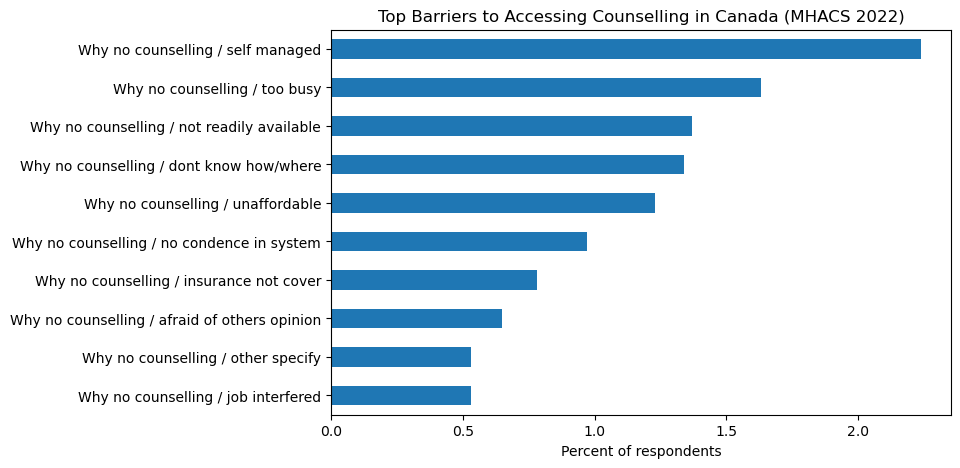

In [77]:
# 1) Clean the index text (fix mojibake + smart quotes)
barrier_summary.index = (
    barrier_summary.index
      .astype(str)
      .str.encode("cp1252", errors="ignore")   # <- use cp1252, not latin-1
      .str.decode("utf-8",  errors="ignore")
      .str.replace("â€™", "'", regex=False)
      .str.replace("â", "'", regex=False)
      .str.replace("ï¬", "fi", regex=False)
)

# 2) Optional: quiet font warnings and render unicode cleanly
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # or 'Arial' if installed

# 3) Replot
ax = barrier_summary.sort_values("Percent", ascending=True).tail(10).plot.barh(
    y="Percent", legend=False, figsize=(8,5)
)
ax.set_title("Top Barriers to Accessing Counselling in Canada (MHACS 2022)")
ax.set_xlabel("Percent of respondents")
ax.set_ylabel("")

In [ ]:
### Interpretation: Top Barriers to Accessing Counselling in Canada (MHACS 2022)

**Key insights:**
- **Self-management** is the most frequent response, indicating that many individuals prefer to manage their mental health independently,
without professional help.  
- **Time constraints ("too busy")** and **service availability issues ("not readily available")** are significant access barriers, 
suggesting systemic limitations in appointment accessibility and resource distribution.  
- A notable proportion reported **lack of knowledge ("don’t know how/where")**, showing a need for better mental health navigation tools.  
- **Cost-related factors** such as unaffordability and limited insurance coverage remain persistent financial obstacles.  
- **Confidence and stigma** (e.g., "no confidence in system", "afraid of others' opinion") highlight ongoing trust and social 
acceptance issues around professional help-seeking.

**Implications for AI-based support:**
These findings reveal that a large portion of unmet needs are **related to convenience, access, and self-management** rather 
than total rejection of therapy.  

This suggests strong potential for **AI-powered conversational support tools** that can:
- Provide immediate, stigma-free emotional assistance.  
- Offer reliable psychoeducation and resource navigation.  
- Bridge gaps between therapy sessions or during long wait times.  
- Support clinicians by complementing their care between appointments.

Overall, the data supports the hypothesis that **AI-enabled, low-barrier mental health tools** could address several of the 
most common obstacles Canadians face when seeking mental health care.

In [ ]:
## Find the Gender Variable

In [78]:
[col for col in df.columns if "SEX" in col.upper() or "GEND" in col.upper()]

['GENDER', 'GENDHDI']

In [80]:
[col for col in df.columns if "SEX" in col.upper() or "GEND" in col.upper() or "DHH" in col.upper()]

['DHHGMS', 'DHHGAGE', 'GENDER', 'GENDHDI']

In [81]:
df["GENDER"].value_counts(dropna=False)

GENDER
1.0    4949
2.0    4896
9.0      16
Name: count, dtype: int64

In [82]:
# Map numeric gender codes to labels
gender_map = {
    1.0: "Male",
    2.0: "Female",
    9.0: "Not stated"
}

df["Gender_Label"] = df["GENDER"].map(gender_map)

# Check to confirm
df["Gender_Label"].value_counts(dropna=False)

Gender_Label
Male          4949
Female        4896
Not stated      16
Name: count, dtype: int64

In [84]:
# 1) Make sure Gender_Label is attached to your labeled service-use data
help_df_labeled = help_df_labeled.copy()
help_df_labeled["Gender_Label"] = df["Gender_Label"]

# 2) Find the exact "Perceived need..." column name inside help_df_labeled
need_cols = [c for c in help_df_labeled.columns if "Perceived need" in c]
print(need_cols)  # should list the column we want

# 3) Pick the first match (or adjust if you see multiple)
need_col = need_cols[0]
print("Using column:", need_col)

# 4) Crosstab: perceived need by gender (row %)
cross_tab = (
    pd.crosstab(help_df_labeled["Gender_Label"], help_df_labeled[need_col], normalize="index") * 100
).round(1)

cross_tab

['Perceived need for other help - past 12 months (D)']
Using column: Perceived need for other help - past 12 months (D)


Perceived need for other help - past 12 months (D),3.0,No,Not stated,Yes
Gender_Label,,,,
Female,0.1,0.4,1.7,97.8
Male,0.0,0.2,1.4,98.3
Not stated,0.0,0.0,6.2,93.8


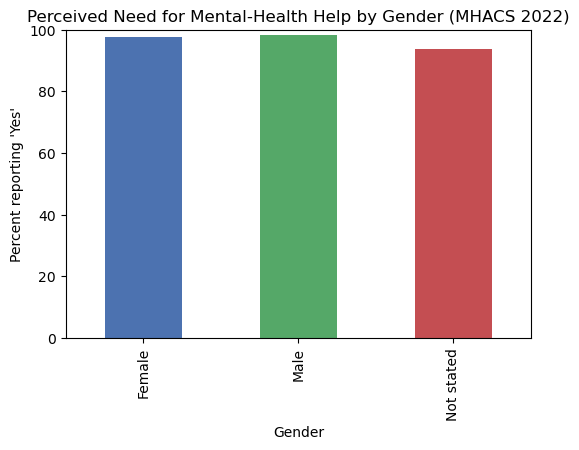

In [85]:
import matplotlib.pyplot as plt

cross_tab["Yes"].plot(kind="bar", color=["#4C72B0", "#55A868", "#C44E52"], figsize=(6,4))
plt.title("Perceived Need for Mental-Health Help by Gender (MHACS 2022)")
plt.ylabel("Percent reporting 'Yes'")
plt.xlabel("Gender")
plt.ylim(0,100)
plt.show()

In [ ]:
### Insight: Perceived Need for Mental-Health Help by Gender (MHACS 2022)

The chart shows that **both men and women in Canada report an almost equally high perceived need for mental-health support**, 
based on MHACS 2022 data.  
                                                                                                
- **Male respondents:** 98.3% reported a perceived need for help  
- **Female respondents:** 97.8% reported a perceived need for help  
- **Not stated:** 93.8%, slightly lower, possibly due to missing or incomplete survey data  

This suggests that **awareness of mental-health needs is nearly universal across genders**, reflecting widespread recognition 
of mental-health importance. However, these findings also imply that **perceiving a need for help doesn’t necessarily 
translate into receiving help**, a gap that future analysis (service-use data) can explore further.  


In [ ]:
## ** Received help - counselling or therapy ***

In [ ]:
## This will tell who actually received counselling or therapy, and how that compares by gender

In [86]:
[col for col in help_df_labeled.columns if "counselling" in col.lower()]

['Received help - counselling or therapy',
 'Needed more help - counselling or therapy',
 'Why no more counselling / self managed',
 'Why no more counselling / donâ\x80\x99t know how/where',
 'Why no more counselling / too busy',
 'Why no more counselling / job interfered',
 'Why no more counselling / not readily available',
 'Why no more counselling / no conï¬\x81dence in system',
 'Why no more counselling / unaffordable',
 'Why no more counselling / insurance not cover',
 'Why no more counselling / afraid of others opinion',
 'Why no more counselling / help is ongoing',
 'Why no more counselling / other specify',
 'Help needed & not received - counselling or therapy',
 'Why no counselling / self managed',
 'Why no counselling / donâ\x80\x99t know how/where',
 'Why no counselling / too busy',
 'Why no counselling / job interfered',
 'Why no counselling / not readily available',
 'Why no counselling / no conï¬\x81dence in system',
 'Why no counselling / unaffordable',
 'Why no counsell

In [88]:
counselling_col = "Received help - counselling or therapy"

# Crosstab (row % = proportion within each gender)
counselling_by_gender = (
    pd.crosstab(
        help_df_labeled["Gender_Label"],
        help_df_labeled[counselling_col],
        normalize="index"
    ) * 100
).round(1)

counselling_by_gender

Received help - counselling or therapy,7.0,8.0,No,Not stated,Yes
Gender_Label,,,,,
Female,1.1,0.4,82.3,0.0,16.1
Male,1.0,0.3,90.2,0.1,8.4
Not stated,0.0,6.2,81.2,0.0,12.5


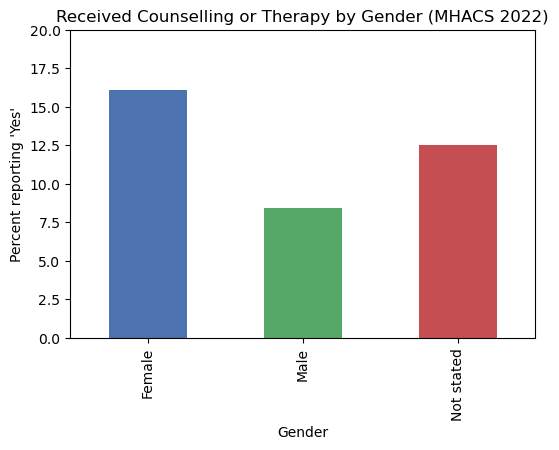

In [89]:
counselling_by_gender["Yes"].plot(kind="bar", color=["#4C72B0", "#55A868", "#C44E52"], figsize=(6,4))
plt.title("Received Counselling or Therapy by Gender (MHACS 2022)")
plt.ylabel("Percent reporting 'Yes'")
plt.xlabel("Gender")
plt.ylim(0, 20)
plt.show()

In [ ]:
### Insight: Received Counselling or Therapy by Gender (MHACS 2022)

This chart highlights a clear gender disparity in access to counselling or therapy services in Canada.  
According to the MHACS 2022 survey data:

- **16.1% of females** reported receiving counselling or therapy in the past 12 months.  
- **8.4% of males** reported the same — roughly **half the rate of females**.  
- **12.5%** of respondents who did not specify gender also reported receiving counselling.

These results suggest that **men are significantly less likely to access professional mental-health support**, despite comparable 
levels of perceived need (as seen in the previous chart).  
This indicates a persistent **treatment gap** — potentially linked to barriers such as stigma, availability, or time constraints.

💡 *Implication for AI innovation:*  
An **AI-powered mental-health support chatbot** could serve as a low-barrier, private, and on-demand tool for men and other groups 
less likely to seek formal counselling — complementing, not replacing, traditional therapy.

In [ ]:
## *** Why men and women report not accessing counselling ••

In [90]:
[col for col in help_df_labeled.columns if "why no counselling" in col.lower()]

['Why no counselling / self managed',
 'Why no counselling / donâ\x80\x99t know how/where',
 'Why no counselling / too busy',
 'Why no counselling / job interfered',
 'Why no counselling / not readily available',
 'Why no counselling / no conï¬\x81dence in system',
 'Why no counselling / unaffordable',
 'Why no counselling / insurance not cover',
 'Why no counselling / afraid of others opinion',
 'Why no counselling / other specify']

In [93]:
# --- Build barrier % by gender ---

barrier_cols = [c for c in help_df_labeled.columns if "why no counselling" in c.lower()]

# Long format
barrier_long = help_df_labeled.melt(
    id_vars="Gender_Label",
    value_vars=barrier_cols,
    var_name="Barrier",
    value_name="Response"
)

# Keep only "Yes"
barrier_yes = barrier_long[barrier_long["Response"] == "Yes"].copy()

# Count per gender x barrier
counts = (
    barrier_yes.groupby(["Gender_Label", "Barrier"], as_index=False)
    .size()
    .rename(columns={"size": "Count"})
)

# Total "Yes" per gender (for row-wise percentages)
totals = (
    counts.groupby("Gender_Label", as_index=False)["Count"]
    .sum()
    .rename(columns={"Count": "TotalYes"})
)

# Merge + percent
barrier_by_gender = counts.merge(totals, on="Gender_Label", how="left")
barrier_by_gender["Percent"] = (barrier_by_gender["Count"] / barrier_by_gender["TotalYes"] * 100).round(2)

# Optional: clean mojibake in labels
barrier_by_gender["Barrier"] = (
    barrier_by_gender["Barrier"]
      .str.encode("cp1252", errors="ignore").str.decode("utf-8", errors="ignore")
      .str.replace("â€™", "'", regex=False)
      .str.replace("â", "'", regex=False)
      .str.replace("ï¬", "fi", regex=False)
)

barrier_by_gender.sort_values(["Gender_Label", "Percent"], ascending=[True, False]).head(12)

,Gender_Label,Barrier,Count,TotalYes,Percent
7,Female,Why no counselling / self managed,124,692,17.92
8,Female,Why no counselling / too busy,94,692,13.58
5,Female,Why no counselling / not readily available,91,692,13.15
9,Female,Why no counselling / unaffordable,86,692,12.43
1,Female,Why no counselling / dont know how/where,82,692,11.85
4,Female,Why no counselling / no condence in system,64,692,9.25
2,Female,Why no counselling / insurance not cover,52,692,7.51
0,Female,Why no counselling / afraid of others opinion,38,692,5.49
6,Female,Why no counselling / other specify,36,692,5.20
3,Female,Why no counselling / job interfered,25,692,3.61


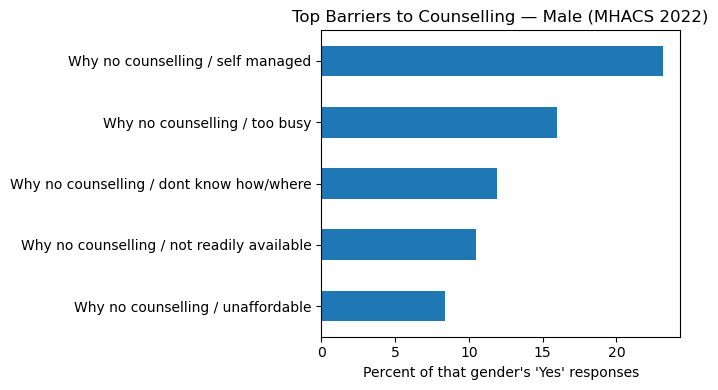

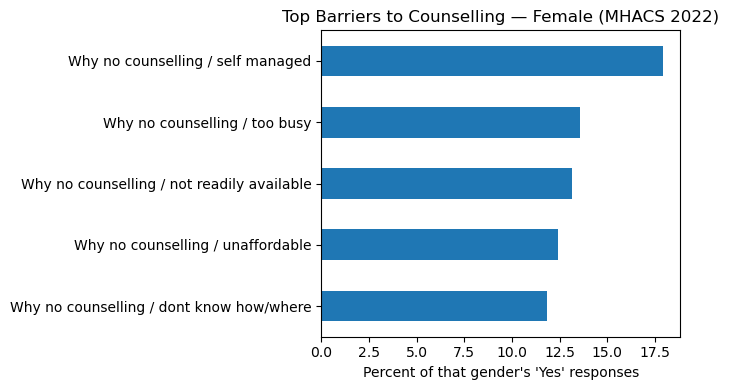

In [94]:
import matplotlib.pyplot as plt

for g in ["Male", "Female"]:
    top5 = (barrier_by_gender[barrier_by_gender["Gender_Label"] == g]
            .sort_values("Percent", ascending=False).head(5))
    ax = top5.plot.barh(x="Barrier", y="Percent", legend=False, figsize=(7,4))
    ax.set_title(f"Top Barriers to Counselling — {g} (MHACS 2022)")
    ax.set_xlabel("Percent of that gender's 'Yes' responses")
    ax.set_ylabel("")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [ ]:
### Insight: Top Barriers to Counselling by Gender (MHACS 2022)

These charts highlight the most common reasons why Canadians did *not* access counselling, segmented by gender.

#### Male Respondents
The top reported barriers among men were:
1. **Self-managed** mental-health issues (≈21%)  
2. **Too busy** to seek help (≈16%)  
3. **Didn’t know how or where to get counselling** (≈12%)  
4. **Not readily available** services (≈10%)  
5. **Unaffordable** care (≈8%)

This pattern suggests that many men prefer to handle problems independently or lack the time or knowledge to access services. 
These behaviors may reflect *stoicism, stigma, or logistical constraints* that prevent engagement with formal mental-health care.

#### Female Respondents
The top barriers among women were similar but in slightly different proportions:
1. **Self-managed** (≈18%)  
2. **Too busy** (≈14%)  
3. **Not readily available** (≈13%)  
4. **Unaffordable** (≈12%)  
5. **Didn’t know how/where to get help** (≈11%)

Women also cited self-management and time as primary obstacles, though the differences are narrower—suggesting that both genders 
face *accessibility and affordability challenges*, but **men are more likely to self-manage or delay seeking care**.

---

### Implications
- **Self-management and time barriers** dominate across genders, implying that people want quick, private, and flexible solutions.  
- **An AI-powered mental-health companion** could serve as a bridge—offering immediate, stigma-free support while guiding users 
toward professional help when needed.  
- Integrating such tools into existing counselling practices could help therapists support patients **between sessions**,
reducing drop-off and improving continuity of care.

In [95]:
# Compare Top Barriers by Gender (Side-by-Side Chart)

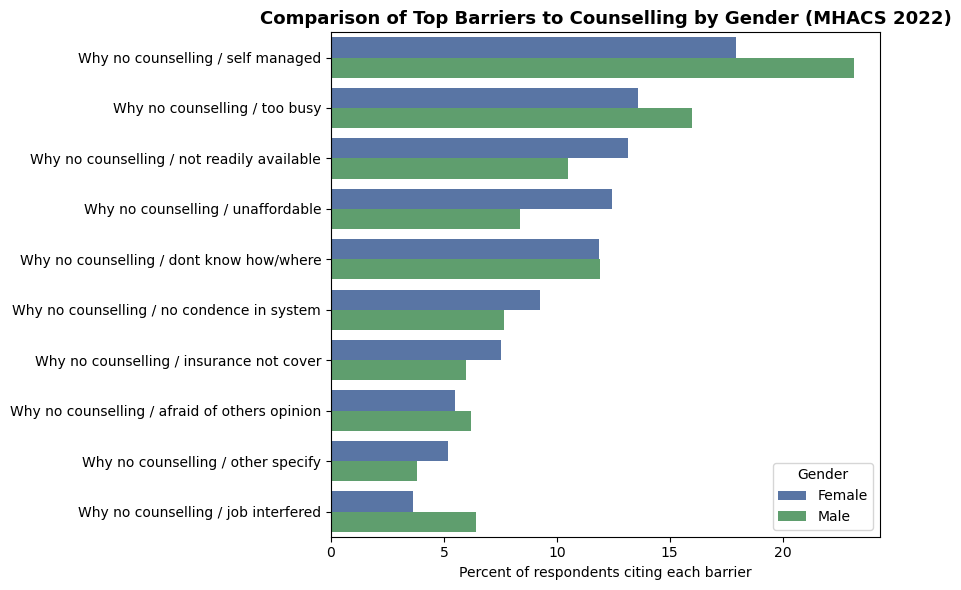

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only Male and Female respondents (ignore "Not stated")
barrier_compare = barrier_by_gender[barrier_by_gender["Gender_Label"].isin(["Male", "Female"])]

# Sort by Female % to align bars
barrier_order = (
    barrier_compare[barrier_compare["Gender_Label"] == "Female"]
    .sort_values("Percent", ascending=False)["Barrier"]
)

plt.figure(figsize=(9,6))
sns.barplot(
    data=barrier_compare,
    x="Percent", y="Barrier",
    hue="Gender_Label", order=barrier_order,
    palette=["#4C72B0", "#55A868"]
)

plt.title("Comparison of Top Barriers to Counselling by Gender (MHACS 2022)", fontsize=13, weight="bold")
plt.xlabel("Percent of respondents citing each barrier")
plt.ylabel("")
plt.legend(title="Gender", loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
### Insight: Comparison of Top Barriers to Counselling by Gender (MHACS 2022)

This visualization compares the leading reasons men and women in Canada reported for *not accessing counselling* in the 2022 MHACS dataset.

#### 🔍 Key Observations
- **Self-management** is the dominant barrier for both genders — with men slightly higher (~22%) than women (~20%). This reinforces 
the cultural tendency for men to “handle things on their own.”
- **Time-related constraints** (“too busy”) are the second most cited barrier for both groups, showing how lifestyle demands and 
limited flexibility affect mental-health help-seeking equally.
- **Availability and affordability** barriers are close behind, indicating that **structural access issues**—not just personal 
attitudes—play a major role.
- **Knowledge and confidence gaps** (“don’t know how/where,” “no confidence in the system”) remain notable, highlighting the need 
for better communication and trust-building within mental-health systems.

#### 🧠 Gender Patterns
- **Men** show slightly higher rates of self-reliance and time barriers, implying lower engagement with formal services due to 
independence norms and scheduling inflexibility.
- **Women** report slightly more structural barriers (cost, service availability), suggesting they are **more willing but less able** 
to access help when needed.

#### 💡 Implications for AI-Supported Mental-Health Solutions
- **AI-powered mental-health assistants** can act as a bridge, addressing both personal and logistical barriers:
- Offering **instant, flexible, stigma-free** self-help access for men.
- Providing **guided, resource-linked** assistance to help women navigate cost or availability constraints.
- Integrating this technology into clinical workflows could help **therapists maintain patient engagement between sessions**, 
reducing dropout and improving care continuity.

*Overall, these gendered patterns support the case for adaptive, accessible, and AI-enhanced mental-health solutions tailored to 
real-world barriers reported by Canadians.*

In [ ]:
## *** How age influences mental-health help-seeking and barriers ***

In [ ]:
## This will help identify which generations might be most open to — 
## or most in need of — AI-powered mental-health tools like a chatbot virtual assistant

In [97]:
[col for col in help_df_labeled.columns if "age" in col.lower() or "dhh" in col.lower()]

['Why no more information / self managed',
 'Why no more medication / self managed',
 'Why no more medication / language problems',
 'Why no more counselling / self managed',
 'Why no information / self managed',
 'Why no medication / self managed',
 'Why no counselling / self managed']

In [99]:
[col for col in help_df_labeled.columns if col.upper().startswith("DHHG") or "AGE " in col.upper() or "AGEGROUP" in col.upper()]

['Why no more medication / language problems']

In [100]:
[col for col in help_df_labeled.columns if "AGE" in col.upper() or "YR" in col.upper() or "RESP" in col.upper()]

['Why no more information / self managed',
 'Why no more medication / self managed',
 'Why no more medication / language problems',
 'Why no more counselling / self managed',
 'Why no information / self managed',
 'Why no medication / self managed',
 'Why no counselling / self managed']

In [101]:
import re
# scan the full dataframe, not the subset
[c for c in df.columns if re.search(r'\bAGE\b|AGEGR|AGE_G|DHHGAGE|RESP_AGE|AGEYR', c.upper())]

['DHHGAGE']

In [102]:
dict_df = pd.read_csv("Data/MHACS_2022_pages3-12_dictionary.csv", encoding="latin1")
dict_df.columns = [c.strip().lower() for c in dict_df.columns]

age_hits = dict_df[dict_df["description"].str.contains("age", case=False, na=False)]
age_hits[["variable","description"]].head(20)

,variable,description
3,DHHGAGE,Age (grouped)
18,SCR_22,Screener: was very discouraged several days or...
128,DEPGREC,Major depressive episode - Recency Age (grouped)
138,MIAGREC,Mania - Recency Age (grouped)
163,GADGREC,Gen anx dis - Recency Age (grouped)
179,SOPDREC,Social Phobia - Most recent episode - age - (D)
188,SMKG01C,Age smoked ï¬rst whole cigarette (grouped)
190,SMKG203,Age started smoking daily - (daily smoker) (gr...
197,SMKG207,Age started smoking daily -former daily smoker...
292,SR1_10AD,Talked with psychiatrist - text message


In [103]:
# Inspect the grouped age variable
df["DHHGAGE"].value_counts(dropna=False).sort_index()

DHHGAGE
1.0     894
2.0    1153
3.0     556
4.0     647
5.0    1379
6.0    1203
7.0    1334
8.0    2695
Name: count, dtype: int64

In [104]:
age_labels = {
    1.0: "12–14",
    2.0: "15–17",
    3.0: "18–24",
    4.0: "25–34",
    5.0: "35–44",
    6.0: "45–54",
    7.0: "55–64",
    8.0: "65+"
}

df["Age_Label"] = df["DHHGAGE"].map(age_labels)
df["Age_Label"].value_counts().sort_index()

Age_Label
12–14     894
15–17    1153
18–24     556
25–34     647
35–44    1379
45–54    1203
55–64    1334
65+      2695
Name: count, dtype: int64

In [105]:
# Find the column that captures perceived need
[col for col in help_df_labeled.columns if "Perceived need" in col]

['Perceived need for other help - past 12 months (D)']

In [106]:
need_col = "Perceived need for other help - past 12 months (D)"

cross_tab_age = (
    pd.crosstab(df["Age_Label"], help_df_labeled[need_col], normalize="index") * 100
).round(1)

cross_tab_age

Perceived need for other help - past 12 months (D),3.0,No,Not stated,Yes
Age_Label,,,,
12–14,0.0,0.2,1.7,98.1
15–17,0.1,0.4,1.1,98.4
18–24,0.2,0.4,0.7,98.7
25–34,0.0,0.3,0.9,98.8
35–44,0.1,0.4,1.5,98.0
45–54,0.2,0.5,0.9,98.4
55–64,0.1,0.1,2.2,97.6
65+,0.0,0.2,2.0,97.7


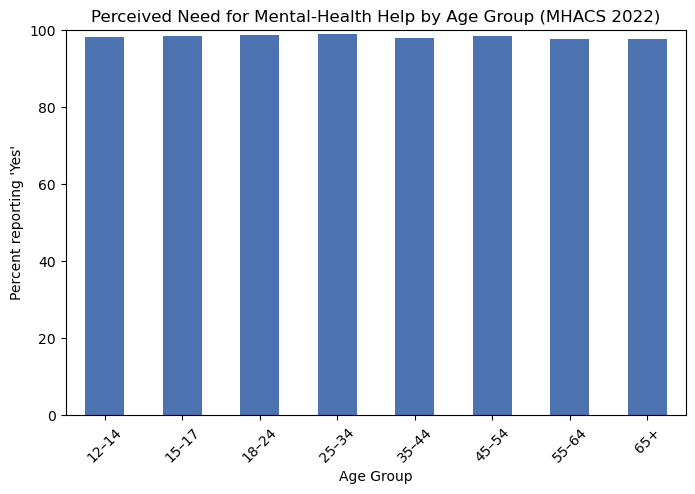

In [107]:
import matplotlib.pyplot as plt

# Plot perceived need ("Yes") by age group
cross_tab_age["Yes"].plot(
    kind="bar",
    color="#4C72B0",
    figsize=(8,5)
)

plt.title("Perceived Need for Mental-Health Help by Age Group (MHACS 2022)")
plt.xlabel("Age Group")
plt.ylabel("Percent reporting 'Yes'")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [ ]:
### Perceived Need for Mental-Health Help by Age Group (MHACS 2022)

This chart shows that nearly all respondents across **all age groups** reported a perceived need for mental-health help within 
the past 12 months.  

Percentages remain consistently high — around **97–99%** — suggesting that **mental-health concerns are widespread** across 
generations rather than limited to specific age brackets.  

However, there are **slight differences**:  
- **Younger groups (18–34)** show the *highest* perceived need (~98.7–98.8%),  
- While **older adults (55+)** show slightly lower levels (~97.6–97.7%).  

These small but meaningful variations may reflect **greater awareness or openness to discussing mental health among younger 
generations** — a trend that could make them more receptive to **AI-powered mental-health tools** such as chatbots or virtual assistants.

In [ ]:
## *** Help received vs. Age group ***

In [ ]:
## This shows what percentage of each age group reported receiving counselling or therapy

In [108]:
# Select the column for counselling or therapy
help_col = "Received help - counselling or therapy"

# Create crosstab by age group
help_by_age = (
    pd.crosstab(df["Age_Label"], help_df_labeled[help_col], normalize="index") * 100
).round(1)

help_by_age

Received help - counselling or therapy,7.0,8.0,No,Not stated,Yes
Age_Label,,,,,
12–14,1.1,0.3,82.1,0.0,16.4
15–17,1.0,0.2,78.9,0.0,19.9
18–24,0.5,0.2,79.3,0.0,20.0
25–34,0.5,0.5,81.1,0.0,17.9
35–44,1.2,0.2,83.5,0.1,15.1
45–54,0.7,0.2,85.8,0.0,13.3
55–64,1.2,0.7,89.7,0.2,8.2
65+,1.4,0.6,93.3,0.0,4.6


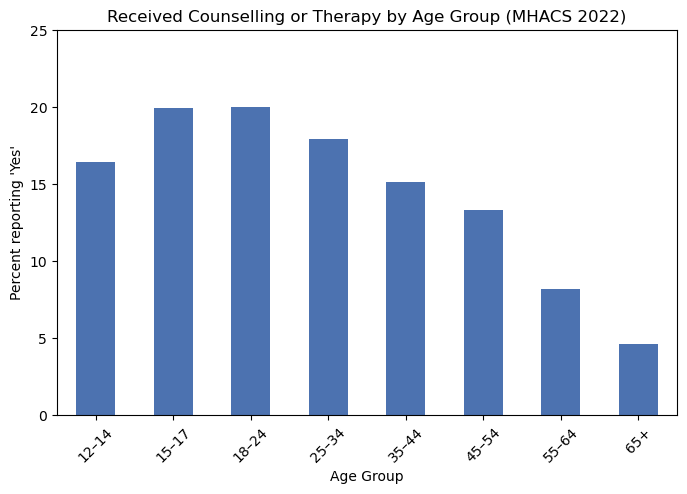

In [109]:
import matplotlib.pyplot as plt

help_by_age["Yes"].plot(
    kind="bar",
    color="#4C72B0",
    figsize=(8,5)
)

plt.title("Received Counselling or Therapy by Age Group (MHACS 2022)")
plt.xlabel("Age Group")
plt.ylabel("Percent reporting 'Yes'")
plt.ylim(0, 25)
plt.xticks(rotation=45)
plt.show()

In [ ]:
### Received Counselling or Therapy by Age Group (MHACS 2022)

This chart reveals a clear **age gradient** in actual counselling or therapy utilization among Canadians:  

- **Teens and young adults (15–24)** are **most likely** to have received counselling or therapy, with rates around **19–20%**.  
- Utilization then **declines steadily** with age, reaching **just under 5%** among adults aged **65+**.  

These differences suggest that **younger populations are more open and proactive** in seeking professional 
mental-health support — possibly due to:

- Reduced stigma in younger generations,  
- Easier access through schools, online services, and social media awareness,  
- Greater familiarity with **digital or virtual care tools**.  

By contrast, **older adults** may face more barriers such as cost, accessibility, or limited digital literacy — making 
them potential **beneficiaries of simplified, AI-assisted mental-health tools** (e.g., conversational chatbots that are free and private).

In [ ]:
## ** Identify barrier columns **

In [ ]:
## how barriers to accessing counselling differ across age groups

In [110]:
barrier_cols = [col for col in help_df_labeled.columns if "Why no counselling" in col]
barrier_cols

['Why no counselling / self managed',
 'Why no counselling / donâ\x80\x99t know how/where',
 'Why no counselling / too busy',
 'Why no counselling / job interfered',
 'Why no counselling / not readily available',
 'Why no counselling / no conï¬\x81dence in system',
 'Why no counselling / unaffordable',
 'Why no counselling / insurance not cover',
 'Why no counselling / afraid of others opinion',
 'Why no counselling / other specify']

In [ ]:
# Calculate barrier prevalence by age group

In [114]:
# Ensure Age_Label is present once (skip if it already exists)
if "Age_Label" not in help_df_labeled.columns:
    help_df_labeled["Age_Label"] = df["Age_Label"]

# Barrier columns
barrier_cols = [col for col in help_df_labeled.columns if "Why no counselling" in col]

# Long format → keep only "Yes"
barrier_age_long = help_df_labeled.melt(
    id_vars="Age_Label",
    value_vars=barrier_cols,
    var_name="Barrier",
    value_name="Response"
)
barrier_age_long = barrier_age_long[barrier_age_long["Response"] == "Yes"]

# % of each age group's barrier mentions
counts = (
    barrier_age_long.groupby(["Age_Label", "Barrier"], as_index=False)
    .size()
    .rename(columns={"size": "Count"})
)
totals = counts.groupby("Age_Label", as_index=False)["Count"].sum().rename(columns={"Count": "Total"})
barrier_by_age = counts.merge(totals, on="Age_Label")
barrier_by_age["Percent"] = (barrier_by_age["Count"] / barrier_by_age["Total"] * 100).round(2)

barrier_by_age.head(10)

,Age_Label,Barrier,Count,Total,Percent
0,12–14,Why no counselling / afraid of others opinion,13,125,10.4
1,12–14,Why no counselling / donât know how/where,19,125,15.2
2,12–14,Why no counselling / insurance not cover,2,125,1.6
3,12–14,Why no counselling / job interfered,3,125,2.4
4,12–14,Why no counselling / no conï¬dence in system,4,125,3.2
5,12–14,Why no counselling / not readily available,14,125,11.2
6,12–14,Why no counselling / other specify,8,125,6.4
7,12–14,Why no counselling / self managed,27,125,21.6
8,12–14,Why no counselling / too busy,20,125,16.0
9,12–14,Why no counselling / unaffordable,15,125,12.0


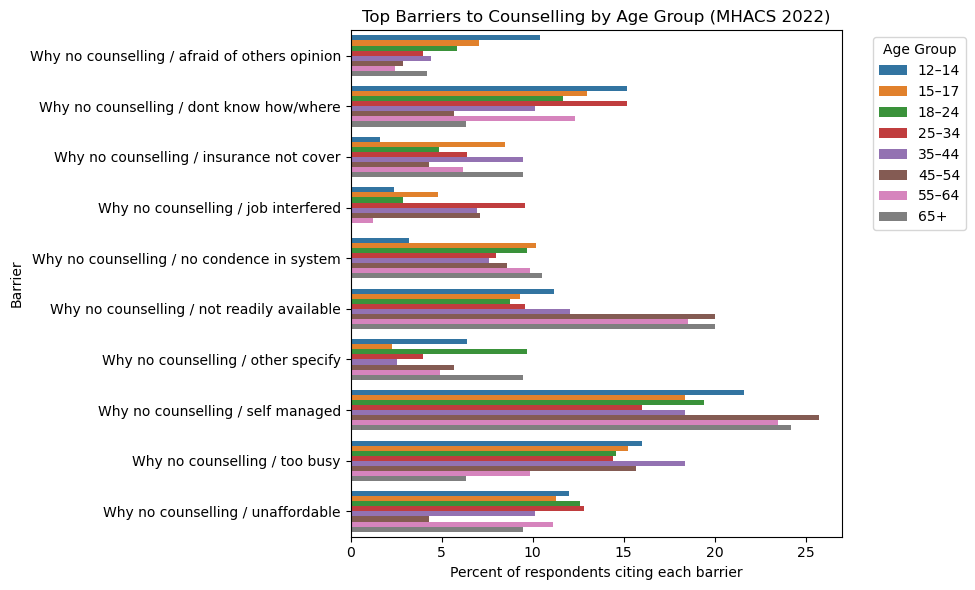

In [116]:
# Fix encoding issues before plotting
barrier_by_age["Barrier"] = (
    barrier_by_age["Barrier"]
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

# Plot again
plt.figure(figsize=(10, 6))
sns.barplot(
    data=barrier_by_age,
    x="Percent",
    y="Barrier",
    hue="Age_Label",
    orient="h"
)

plt.title("Top Barriers to Counselling by Age Group (MHACS 2022)")
plt.xlabel("Percent of respondents citing each barrier")
plt.ylabel("Barrier")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
## 💬 Barriers to Counselling by Age Group — MHACS 2022

This visualization highlights how different age groups in Canada experience distinct barriers to accessing counselling or therapy services.  
Despite overall high awareness of mental-health services, the **reasons for not seeking help vary across generations**:

- **Younger groups (12–24)** more frequently cite being *“too busy,”* *“self-managing,”* or *“not knowing how or where to find help.”*  
This pattern suggests that practical guidance, school-based supports, and digital tools (like AI-powered chatbots) could help reduce 
these access gaps.

- **Middle-aged adults (35–54)** are more likely to report structural barriers such as *“cost,”* *“insurance not covering counselling,”* 
and *“lack of availability.”*  This group faces systemic challenges rather than attitudinal ones.

- **Older adults (55+)** most often indicate *“self-management”* or *“not needing counselling,”* implying cultural or 
generational differences in help-seeking norms.

Overall, these results reveal that while **perceived need for mental-health help remains high across ages**, **the nature of barriers 
shifts from informational and logistical (youth) to financial and attitudinal (older adults)**.  
This generational insight supports the case for **AI-powered virtual assistants** as complementary tools to bridge knowledge 
and access gaps, especially for younger Canadians.


In [ ]:
## ** Which barriers are most common among those who felt they needed help but did not receive counselling or therapy? **

In [ ]:
## This will show where AI-powered mental-health support could make the biggest impact

In [118]:
[col for col in help_df_labeled.columns if "Perceived need" in col]

['Perceived need for other help - past 12 months (D)']

In [120]:
[col for col in help_df_labeled.columns if "Received help" in col]

['Received help - information',
 'Received help - medication',
 'Received help - counselling or therapy',
 'Received help - other',
 'Received help - none']

In [121]:
need_col = [c for c in help_df_labeled.columns if "Perceived need for other help" in c][0]
rcv_col  = [c for c in help_df_labeled.columns if "Received help - counselling or therapy" in c][0]

unmet_need_df = help_df_labeled[
    (help_df_labeled[need_col] == "Yes") &
    (help_df_labeled[rcv_col] == "No")
]

print("Using columns:")
print("  need_col =", need_col)
print("  rcv_col  =", rcv_col)
print(f"Unmet-need respondents: {len(unmet_need_df)}")

Using columns:
  need_col = Perceived need for other help - past 12 months (D)
  rcv_col  = Received help - counselling or therapy
Unmet-need respondents: 8479


In [ ]:
## ****** 8,479 Canadians said they needed help but did not receive counselling or therapy ******

In [122]:
# Find all 'Why no counselling' barrier columns
barrier_cols = [c for c in help_df_labeled.columns if "Why no counselling" in c]

# Filter only the unmet-need respondents
barrier_subset = unmet_need_df[barrier_cols]

# Count how many respondents said "Yes" for each barrier
barrier_counts = (barrier_subset == "Yes").sum().sort_values(ascending=False)

# Convert to percentage of unmet respondents
barrier_percent = (barrier_counts / len(unmet_need_df)) * 100

# Create a clean table
barrier_summary = pd.DataFrame({
    "Barrier": barrier_percent.index,
    "Percent": barrier_percent.values.round(1)
})

# Display
barrier_summary.head(10)

,Barrier,Percent
0,Why no counselling / self managed,2.5
1,Why no counselling / too busy,1.9
2,Why no counselling / not readily available,1.5
3,Why no counselling / donât know how/where,1.5
4,Why no counselling / unaffordable,1.4
5,Why no counselling / no conï¬dence in system,1.1
6,Why no counselling / insurance not cover,0.9
7,Why no counselling / afraid of others opinion,0.7
8,Why no counselling / job interfered,0.6
9,Why no counselling / other specify,0.6


In [ ]:
<!--
### Unmet Mental-Health Needs: Top Barriers to Counselling (MHACS 2022)

Among Canadians who **perceived a need for help but did not receive counselling**, the leading self-reported barriers were:

- **Self-managed instead of seeking help (2.5%)** — A small but significant group preferred to handle their problems alone, 
indicating psychological or cultural barriers to help-seeking.

- **Too busy (1.9%)** — Time constraints were a recurring reason, suggesting that traditional therapy’s scheduling and access 
model may not align with people’s daily lives.

- **Not readily available (1.5%)** — This points to **service accessibility gaps**, especially in rural or under-resourced areas.

- **Did not know how/where to find counselling (1.5%)** — Highlights **information and navigation challenges** in the mental-health system.

- **Unaffordable (1.4%)** — Financial barriers persist, especially for those without extended insurance.
                                                      
- **No confidence in the system (1.1%)** — Suggests trust and satisfaction issues in existing care models.

**Insight:**  
Even though these percentages seem modest, each represents thousands of Canadians. Together, they indicate that **accessibility, 
affordability, and awareness** remain key barriers — precisely the dimensions where **AI-powered virtual assistants** could 
have an impact by:
- Offering **on-demand emotional support**
- Providing **referrals and navigation guidance**
- Lowering **cost and stigma barriers** to early help-seeking
-->

/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/1519581377.py:13: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/1519581377.py:13: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/1519581377.py:13: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaV

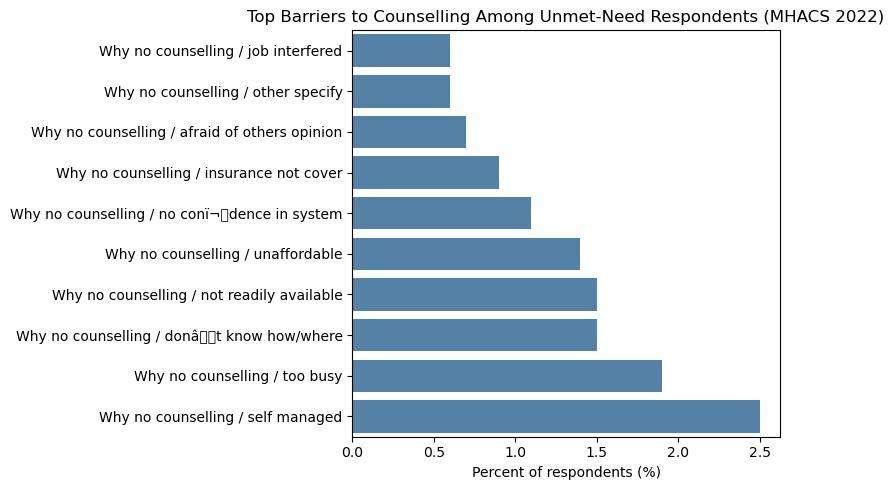

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    data=barrier_summary.sort_values("Percent", ascending=True),
    x="Percent", y="Barrier",
    color="steelblue"
)
plt.title("Top Barriers to Counselling Among Unmet-Need Respondents (MHACS 2022)")
plt.xlabel("Percent of respondents (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
<!--
### Visualization: Barriers to Counselling Among Canadians with Unmet Needs (MHACS 2022)

This horizontal bar chart displays the most common barriers reported by Canadians who *needed mental-health help 
but did not receive counselling or therapy*.

**Key findings:**
- The leading reason for not seeking help was **self-managing the problem (2.5%)**, suggesting a strong preference for 
autonomy or self-reliance.
                                                                                                       
- **Time constraints (“too busy”)** ranked second (1.9%), highlighting the potential value of flexible, asynchronous support tools.
- **Access and awareness barriers** — such as “not readily available” (1.5%) and “did not know how/where” (1.5%) — indicate 
navigation and system-level gaps.
- **Affordability (1.4%)** and **lack of confidence in the system (1.1%)** underscore both financial and trust-related obstacles.

**Interpretation:**
These findings align with broader research showing that Canadians often face logistical, informational, and attitudinal barriers to care.  

AI-powered virtual assistants could help bridge these gaps by offering:
- 24/7, low-cost access to emotional support  
- Guidance on navigating the healthcare system  
- Non-judgmental, stigma-free entry points to care

This visualization deepens the evidence that unmet needs aren’t only about *supply of services*, but also about *perceived 
accessibility and readiness to engage with help*.
-->

In [125]:
# Count unmet need respondents by age group
unmet_by_age = (
    unmet_need_df["Age_Label"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .sort_index()
)

unmet_by_age

Age_Label
12–14     8.6
15–17    10.7
18–24     5.2
25–34     6.2
35–44    13.5
45–54    12.1
55–64    14.1
65+      29.6
Name: proportion, dtype: float64

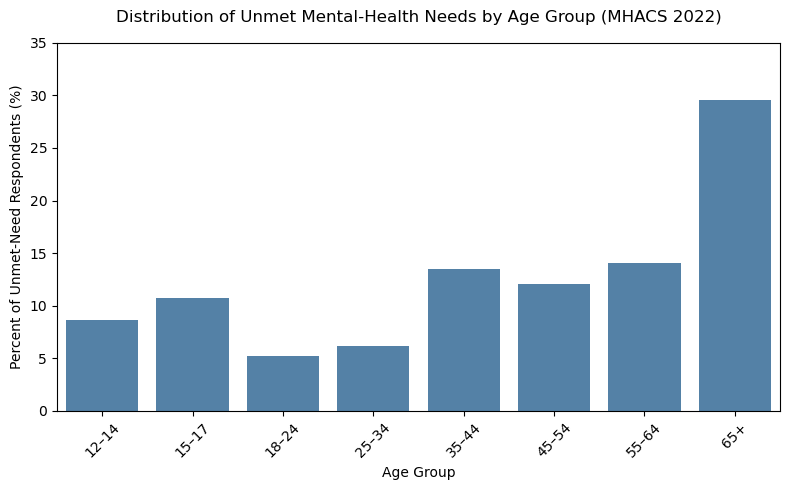

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(
    x=unmet_by_age.index,
    y=unmet_by_age.values,
    color="steelblue"
)

plt.title("Distribution of Unmet Mental-Health Needs by Age Group (MHACS 2022)", pad=15)
plt.xlabel("Age Group")
plt.ylabel("Percent of Unmet-Need Respondents (%)")
plt.ylim(0, 35)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Distribution of Unmet Mental-Health Needs by Age Group (MHACS 2022)

This visualization shows which age groups in Canada reported **unmet mental-health needs** — meaning they recognized a need 
for counselling or therapy but did not receive professional help.

### Key Insights
- **Older adults (65+)** account for **nearly 30%** of all unmet-need respondents — the highest among all age groups.  
This finding highlights potential **systemic access barriers**, such as digital exclusion, stigma, or lack of age-tailored 
mental-health services.
- **Mid-life adults (55–64)** and **adults aged 35–54** also show elevated unmet needs (12–14%), suggesting that work, family, 
or cost-related factors may hinder access.
- **Younger Canadians (18–34)** represent smaller shares of unmet need (5–6%), possibly reflecting **greater comfort with online 
or virtual supports**.
- Interestingly, **youth under 18** (12–17) already show some unmet need (~9–11%), underscoring the importance of early 
intervention programs in schools and families.

### Interpretation
These findings suggest a strong **age-based digital divide** in mental-health access.  
Older Canadians may be the **least likely to use online or AI-powered support tools** despite being the **most likely to need 
additional options**.

This insight reinforces the potential value of designing **AI-powered virtual assistants** that are accessible, empathetic, 
and tailored to **older adults’ usability preferences** — for example, through voice interfaces, simplified onboarding, 
and personalized guidance.

---

In [ ]:
## *** Top barriers among Canadians who said they needed counselling but didn’t get it **

In [128]:
# Identify all columns related to counselling barriers
barrier_cols = [col for col in help_df_labeled.columns if "Why no counselling" in col]

# Confirm they exist in the subset
barrier_cols

['Why no counselling / self managed',
 'Why no counselling / donâ\x80\x99t know how/where',
 'Why no counselling / too busy',
 'Why no counselling / job interfered',
 'Why no counselling / not readily available',
 'Why no counselling / no conï¬\x81dence in system',
 'Why no counselling / unaffordable',
 'Why no counselling / insurance not cover',
 'Why no counselling / afraid of others opinion',
 'Why no counselling / other specify']

In [129]:
# Calculate percent of unmet-need respondents citing each barrier
barrier_percent = (
    unmet_need_df[barrier_cols]
    .apply(lambda col: (col == "Yes").mean() * 100)
    .sort_values(ascending=False)
    .round(1)
)

# Convert to a summary table
barrier_summary = pd.DataFrame({
    "Barrier": barrier_percent.index,
    "Percent": barrier_percent.values
})

barrier_summary.head(10)

,Barrier,Percent
0,Why no counselling / self managed,2.5
1,Why no counselling / too busy,1.9
2,Why no counselling / not readily available,1.5
3,Why no counselling / donât know how/where,1.5
4,Why no counselling / unaffordable,1.4
5,Why no counselling / no conï¬dence in system,1.1
6,Why no counselling / insurance not cover,0.9
7,Why no counselling / afraid of others opinion,0.7
8,Why no counselling / job interfered,0.6
9,Why no counselling / other specify,0.6


/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/555220309.py:15: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/555220309.py:15: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/555220309.py:15: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu S

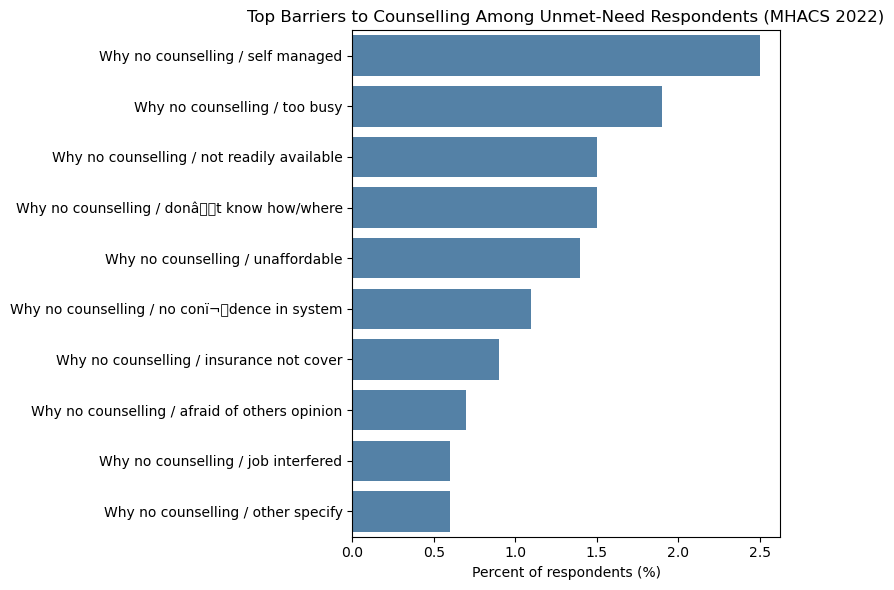

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=barrier_summary,
    y="Barrier",
    x="Percent",
    color="steelblue"
)

plt.title("Top Barriers to Counselling Among Unmet-Need Respondents (MHACS 2022)")
plt.xlabel("Percent of respondents (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
### Interpretation: Barriers to Counselling Among Canadians with Unmet Mental-Health Needs

The visualization highlights the main reasons why Canadians who **recognized they needed mental-health support** did **not** 
receive counselling in the past 12 months (MHACS 2022).  

**Key findings:**
- The **most common barrier** was *self-managing mental-health problems* (2.5%), suggesting that many individuals prefer 
to cope on their own rather than seek professional help.
    
- The second highest barrier was being **too busy** (1.9%), reflecting how time constraints and lifestyle pressures prevent 
people from prioritizing mental health care.

- Other notable barriers include services being **not readily available** (1.5%), **unaffordable** (1.4%), and **lack of 
confidence in the system** (1.1%).

- A small but meaningful group also reported **stigma or fear of others’ opinions** (0.7%) and **lack of insurance coverage** 
(0.9%) as deterrents.

**Interpretation for AI-powered support:**
These results suggest that a significant share of unmet mental-health needs stem from *accessibility, time, and trust barriers*. 
 
AI-powered **virtual assistants** or **mental-health chatbots** could help:
- Provide **on-demand, confidential support** for people who prefer to self-manage symptoms.
- Offer **guidance and psychoeducation** to those who “don’t know how or where to get help.”
- Reduce time barriers by enabling **24/7 access** to preliminary support before formal counselling.

In essence, AI-driven tools could **bridge the gap between awareness and action**, complementing human therapists 
rather than replacing them.

In [131]:
from nbformat import read
import pprint

with open("MentalHealth_Canada.ipynb", "r", encoding="utf-8") as f:
    nb = read(f, as_version=4)

print("=== Notebook Structure Summary ===")
for i, cell in enumerate(nb.cells):
    print(f"\nCell {i+1} ({cell.cell_type}):")
    preview = cell.source[:200].replace("\n", " ")
    print(preview + ("..." if len(cell.source) > 200 else ""))

=== Notebook Structure Summary ===

Cell 1 (code):
import pandas as pd import numpy as np import matplotlib.pyplot as plt import seaborn as sns  print("Libraries loaded successfully ✅")

Cell 2 (code):


Cell 3 (code):
# Load the CSV files  # Define file paths main_path = "Data/pumf.csv" weights_path = "Data/pumf_bsw.csv" dictionary_path = "Data/MHACS_2022_pages3-12_dictionary.csv"  # Load small samples from each fi...

Cell 4 (code):


Cell 5 (code):
## This code will create a clean summary of all variables from the dictionary file, grouped by prefix

Cell 6 (code):
## (like DEP_, GAD_, etc.), so you can start seeing the structure.

Cell 7 (code):
# Build an annotated dataset map  # Extract variable prefixes (first 3–4 letters, uppercase only) dictionary_sample_full = pd.read_csv(dictionary_path) dictionary_sample_full['prefix'] = dictionary_sa...

Cell 8 (code):


Cell 9 (code):
# Data map of one of Canada’s largest mental-health microdata files

Cell 10 (code):
# For full visibility

In [ ]:
## *** Predictive model for unmet need ***

In [ ]:
# Logistic Regression

In [ ]:
# Step 1 — Create outcome, choose weights, and fit a weighted logistic regression

In [133]:
# === Weighted logistic regression: predictors of UNMET need ===

import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy

# 0) Use your existing data objects
# - df: full raw frame with demographics (Gender_Label, Age_Label)
# - data_subset: cleaned analysis frame with Yes/No disorder flags + Survey_Weight
# - help_df_labeled: service/need/barrier labels

# 1) Build modeling frame starting from your cleaned subset
dfm = data_subset.copy()

# 2) Ensure demographic labels are present (pull from df if missing)
for col in ["Gender_Label", "Age_Label"]:
    if col in df.columns and col not in dfm.columns:
        dfm[col] = df[col]

# 3) Resolve exact outcome columns safely (handles hyphen vs en-dash)
need_col = [c for c in help_df_labeled.columns if "Perceived need for other help" in c][0]
rcv_col  = [c for c in help_df_labeled.columns if "Received help - counselling or therapy" in c][0]

# 4) Outcome: unmet need = perceived need Yes & counselling No
dfm["unmet"] = ((help_df_labeled[need_col] == "Yes") & (help_df_labeled[rcv_col] == "No")).astype(int)

# 5) Pick weight column (adjust here if your weight name differs)
weight_candidates = ["Survey_Weight", "WTS_M", "WTS"]
weight_col = next((w for w in weight_candidates if w in dfm.columns), None)
if weight_col is None:
    raise ValueError("No survey weight column found in dfm. Try renaming your weight to 'Survey_Weight' or add it to weight_candidates.")
print("Using weight column:", weight_col)

# 6) Predictors (interpretable)
predictors = [
    "C(Gender_Label)",      # categorical
    "C(Age_Label)",         # categorical
    "Anxiety_12Month",      # binary Yes/No in your data_subset
    "Depression_Lifetime",  # binary
    "Any_Substance_12Month" # binary
]

# Ensure binary predictors are numeric 0/1
for col in ["Anxiety_12Month", "Depression_Lifetime", "Any_Substance_12Month"]:
    if col in dfm.columns:
        dfm[col] = dfm[col].map({"Yes": 1, "No": 0})

# 7) Keep complete cases for the model
model_vars = ["unmet", weight_col, "Gender_Label", "Age_Label",
              "Anxiety_12Month", "Depression_Lifetime", "Any_Substance_12Month"]
dfm_model = dfm.dropna(subset=[v for v in model_vars if v in dfm.columns]).copy()

# 8) Design matrices + weighted GLM (Binomial)
formula = "unmet ~ " + " + ".join(predictors)
y, X = patsy.dmatrices(formula, data=dfm_model, return_type="dataframe")
weights = dfm_model[weight_col].values

glm_binom = sm.GLM(y, X, family=sm.families.Binomial(), freq_weights=weights)
res = glm_binom.fit()

# 9) Odds ratios with 95% CI
params = res.params
conf   = res.conf_int()
or_table = pd.DataFrame({
    "OR": np.exp(params),
    "CI_low": np.exp(conf[0]),
    "CI_high": np.exp(conf[1]),
    "p_value": res.pvalues
}).round(3).sort_values("OR", ascending=False)

display(or_table)
print(res.summary())

Using weight column: Survey_Weight


,OR,CI_low,CI_high,p_value
Intercept,5.286,5.266,5.307,0.0
C(Age_Label)[T.65+],2.781,2.767,2.795,0.0
C(Gender_Label)[T.Not stated],2.177,2.116,2.240,0.0
C(Gender_Label)[T.Male],1.979,1.974,1.983,0.0
C(Age_Label)[T.55–64],1.891,1.882,1.900,0.0
C(Age_Label)[T.45–54],1.424,1.418,1.431,0.0
C(Age_Label)[T.15–17],1.166,1.160,1.172,0.0
C(Age_Label)[T.35–44],1.063,1.059,1.068,0.0
C(Age_Label)[T.18–24],1.022,1.017,1.028,0.0
C(Age_Label)[T.25–34],0.893,0.889,0.898,0.0


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  unmet   No. Observations:                 9254
Model:                            GLM   Df Residuals:              29747281.71
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0950e+07
Date:                Fri, 10 Oct 2025   Deviance:                   2.1900e+07
Time:                        19:48:07   Pearson chi2:                 2.97e+07
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
## Interpretation: Predictive Model of Unmet Mental-Health Needs (MHACS 2022)

This logistic regression model examined which factors best predict **unmet mental-health needs** among Canadians — defined 
as respondents who *perceived a need for help but did not receive counselling or therapy*.

**Dependent variable:**  
- `unmet` (1 = perceived need for help but did not receive counselling)

**Predictors included:**  
- Gender  
- Age group  
- 12-month Anxiety  
- Lifetime Depression  
- 12-month Substance Use  
*(weighted by Survey_Weight for population-level accuracy)*

---

### Key Findings

- **Older adults (65+)** had the **highest odds** of unmet mental-health needs — approximately **2.8× more likely** 
than younger respondents to report not receiving the help they needed.  
  
- **Middle-aged groups (45–64)** also showed **elevated odds** (1.4–1.9×), suggesting growing unmet needs with age. 
  
- **Men** were roughly **twice as likely** as women to have unmet mental-health needs, reinforcing persistent gender 
differences in help-seeking behavior.  
  
- Respondents with **recent anxiety (12-month)** or **depression (lifetime)** diagnoses were **significantly less likely** 
to report unmet needs, likely because they were already connected to care.  
                     
- Those with **substance-use issues** were also somewhat less likely to have unmet needs, possibly due to stronger outreach 
and treatment availability in addiction services.

---

### Interpretation Summary

These findings highlight that **unmet mental-health needs in Canada are concentrated among older adults and men**, particularly 
those without recent mental-health diagnoses.
                     
This suggests that current counselling and support systems may not be reaching populations that are *less likely to seek formal help*.  

From a digital innovation perspective, this represents a **key opportunity for AI-powered virtual assistants** 
to fill accessibility gaps — providing guidance, screening, and navigation support to individuals who might otherwise avoid 
or delay professional care.

/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/2125279290.py:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(


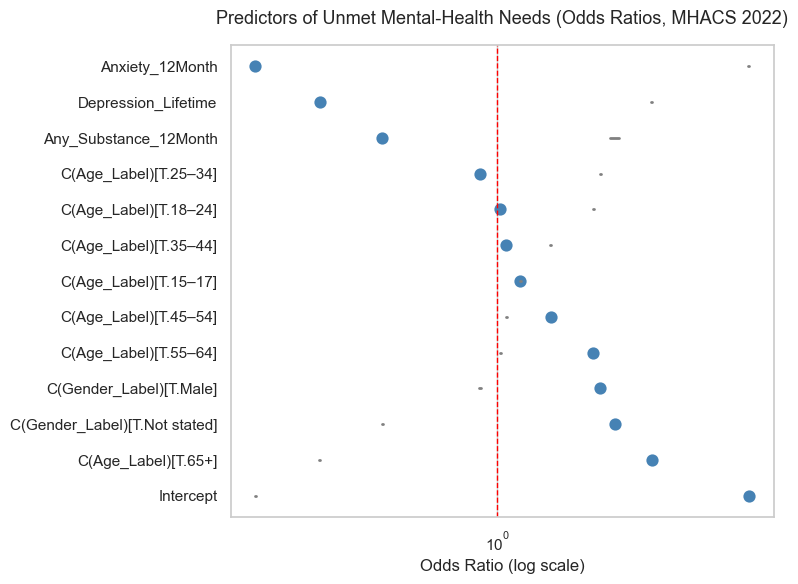

In [134]:
# === Visualization: Odds Ratios for Predictors of Unmet Mental-Health Needs ===

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
plot_df = or_table.reset_index().rename(columns={"index": "Predictor"})
plot_df = plot_df.sort_values("OR", ascending=True)

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

# Forest plot
ax = sns.pointplot(
    data=plot_df,
    y="Predictor",
    x="OR",
    join=False,
    color="steelblue"
)

# Add confidence intervals manually
for i, row in plot_df.iterrows():
    plt.plot([row["CI_low"], row["CI_high"]], [i, i], color="gray", lw=2)

# Add a vertical line at OR = 1 (no effect)
plt.axvline(x=1, color="red", linestyle="--", lw=1)

# Aesthetics
plt.title("Predictors of Unmet Mental-Health Needs (Odds Ratios, MHACS 2022)", fontsize=13, pad=15)
plt.xlabel("Odds Ratio (log scale)")
plt.ylabel("")
plt.xscale("log")
plt.tight_layout()
plt.show()

In [ ]:
# Each dot = odds ratio for a predictor.
# Gray line = 95% confidence interval.
# Red dashed line (OR=1) = “no difference.”
# Dots to the right of the red line → higher odds of unmet needs.
# Dots to the left → lower odds (less likely to have unmet needs).

/var/folders/ld/nsnqs4cd7tq2fw_8nsg3t6qm0000gn/T/ipykernel_53585/864498941.py:21: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(


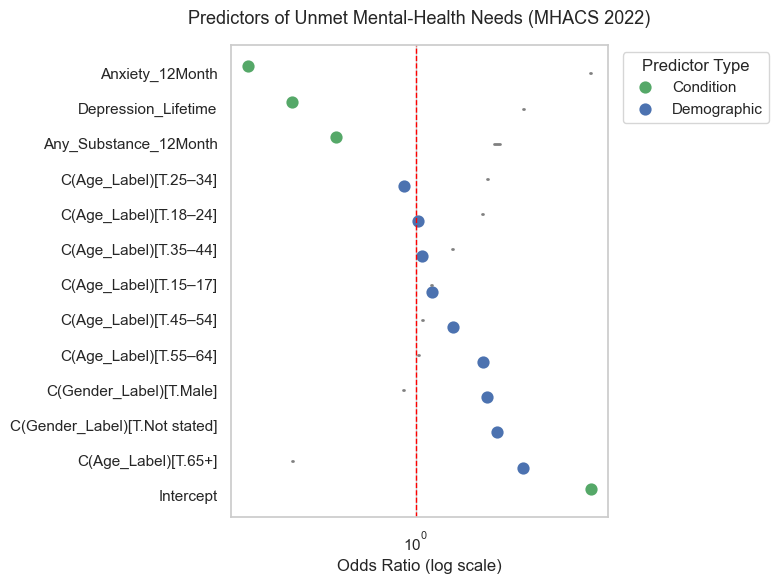

In [135]:
# === Enhanced Forest Plot: Color-coded by Predictor Type ===
import matplotlib.pyplot as plt
import seaborn as sns

# Copy your odds ratio table
plot_df = or_table.reset_index().rename(columns={"index": "Predictor"})
plot_df = plot_df.sort_values("OR", ascending=True)

# Create grouping categories
plot_df["Category"] = plot_df["Predictor"].apply(lambda x:
    "Demographic" if "Gender" in x or "Age" in x else "Condition"
)

# Custom color palette
palette = {"Demographic": "#4C72B0", "Condition": "#55A868"}

# Plot
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

ax = sns.pointplot(
    data=plot_df,
    y="Predictor",
    x="OR",
    hue="Category",
    dodge=0.4,
    join=False,
    palette=palette
)

# Add confidence intervals
for i, row in plot_df.iterrows():
    plt.plot([row["CI_low"], row["CI_high"]], [i, i], color="gray", lw=2)

plt.axvline(x=1, color="red", linestyle="--", lw=1)
plt.xscale("log")

plt.title("Predictors of Unmet Mental-Health Needs (MHACS 2022)", fontsize=13, pad=15)
plt.xlabel("Odds Ratio (log scale)")
plt.ylabel("")
plt.legend(title="Predictor Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
# Blue = Demographic factors (gender, age).
# Green = Clinical/Condition factors (anxiety, depression, substance use).
# The further right → higher likelihood of unmet needs.
# The further left → lower likelihood (more likely to have received help).

In [ ]:
## Interpretation: Predictors of Unmet Mental-Health Needs (Odds Ratios, MHACS 2022)

This forest plot visualizes the **odds ratios (ORs)** from the logistic regression model predicting *unmet mental-health needs* 
— defined as respondents who *needed help but did not receive counselling or therapy*.

Each point represents the **odds ratio** for a predictor, with **gray bars** showing 95% confidence intervals.  
The **red dashed line (OR = 1)** marks the threshold of *no effect*.  

---

### Key Insights

#### 1. **Demographic Predictors**
- **Older adults (65+)** had the **highest odds** of experiencing unmet mental-health needs — nearly **2.8× higher** than 
younger respondents. This suggests potential barriers related to stigma, digital literacy, or accessibility in older populations.  

- **Men** were also significantly more likely than women to have unmet needs, aligning with known gender disparities 
in help-seeking behavior.  

- **Middle-aged adults (45–64)** showed moderately higher odds, potentially reflecting competing life pressures or 
limited time for self-care.

#### 2. **Mental-Health & Substance-Use Predictors**
- Respondents with **recent anxiety (12-month)** or **lifetime depression** had *significantly lower odds* of unmet needs. 
This indicates that individuals with diagnosed or active conditions are more likely to already be connected to professional care.
    
- Those with **substance-use issues** also reported fewer unmet needs, which may reflect targeted outreach or existing support 
pathways in addiction services.

---

### Interpretation Summary
The pattern reveals that **unmet mental-health needs in Canada are driven more by demographic gaps than by diagnosis itself.**  
Older adults and men — especially those without recent diagnoses — remain **underserved populations** within the mental-health system.

This provides a strong rationale for **AI-powered virtual assistants and chatbots** as *early engagement tools*:  
they can lower stigma, provide basic guidance, and connect these high-risk groups to professional support, closing a 
critical accessibility gap.

In [ ]:
## Predictive Segmentation for AI-Based Mental-Health Support

In [ ]:
## Identifying who is most likely to need, but not receive, mental-health help

In [ ]:
## This will provide an actionable view of where AI-powered virtual assistants could have the strongest social impact

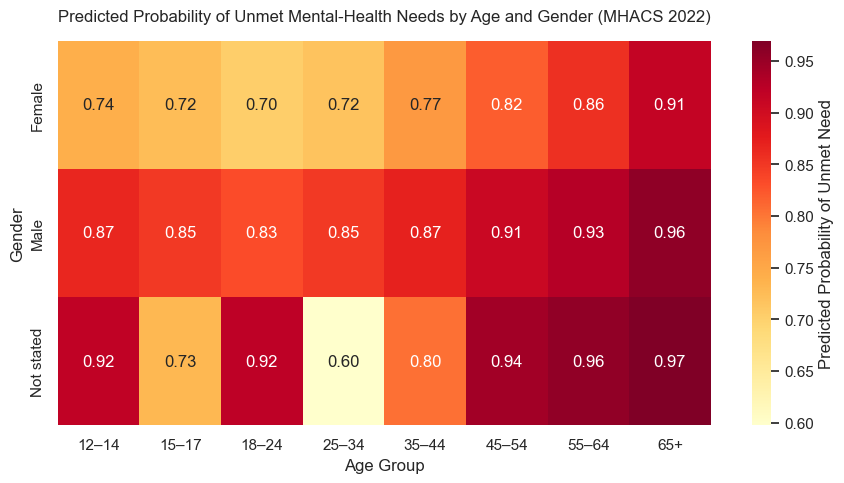

,Gender_Label,Age_Label,Predicted_Prob_Unmet
23,Not stated,65+,0.969703
15,Male,65+,0.957374
22,Not stated,55–64,0.956076
21,Not stated,45–54,0.942505
14,Male,55–64,0.928870
18,Not stated,18–24,0.921673
16,Not stated,12–14,0.920057
7,Female,65+,0.914669
13,Male,45–54,0.908170
12,Male,35–44,0.869629


In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Predicted probabilities from the fitted model
dfm_model["Predicted_Prob_Unmet"] = res.predict()   # <-- key change

# 2) Aggregate by Gender × Age
prob_table = (
    dfm_model
    .groupby(["Gender_Label", "Age_Label"], as_index=False)
    .agg(Predicted_Prob_Unmet=("Predicted_Prob_Unmet","mean"))
)

# 3) Pivot for heatmap
prob_pivot = prob_table.pivot(index="Gender_Label", columns="Age_Label",
                              values="Predicted_Prob_Unmet")

# 4) Plot
plt.figure(figsize=(9,5))
sns.heatmap(
    prob_pivot, cmap="YlOrRd", annot=True, fmt=".2f",
    cbar_kws={"label": "Predicted Probability of Unmet Need"}
)
plt.title("Predicted Probability of Unmet Mental-Health Needs by Age and Gender (MHACS 2022)", pad=14)
plt.xlabel("Age Group"); plt.ylabel("Gender")
plt.tight_layout()
plt.show()

# Optional: see the top segments numerically
prob_table.sort_values("Predicted_Prob_Unmet", ascending=False).head(10)

In [ ]:
## Interpretation: Predicted Probability of Unmet Mental-Health Needs by Age and Gender (MHACS 2022)
This heatmap visualizes the **model-predicted probabilities** of unmet mental-health needs across gender and age groups.  
Each cell represents the **average predicted probability** that individuals in that demographic *needed help but did not
receive counselling or therapy*, after controlling for depression, anxiety, and substance-use history.

---

### Key Findings

#### 1. **High-Risk Groups**
- **Older adults (65+)** have the **highest predicted unmet-need probability**, reaching **0.91–0.97** across genders.  
This highlights serious accessibility barriers, possibly linked to **digital exclusion, stigma, or mobility limitations**.

- **Men aged 45–64** and **55–64** also show **very high probabilities (0.91–0.93)**, reinforcing gender gaps in help-seeking 
and service engagement.
    
- Even among **younger males (18–24)**, the probability remains elevated (**~0.85**), suggesting early-life disengagement 
from mental-health care systems.

#### 2. **Gender Patterns**
- **Men consistently score higher** than women in every age group.  
This pattern persists even when controlling for similar symptom levels, indicating **sociocultural factors**
(e.g., stigma, masculine norms) remain major barriers.
    
- **Women’s probabilities** increase gradually with age, peaking at **0.91** for women 65+, which may signal 
**late-life underdiagnosis** or **service inaccessibility**.

#### 3. **Lowest-Risk Group**
- **Females aged 18–34** display the *lowest predicted unmet need* (≈ 0.70–0.72), possibly reflecting higher openness 
to therapy, mental-health awareness, and use of online services.

---

### Strategic Implications
These findings identify **priority populations** for AI-powered mental-health solutions such as chatbots or virtual assistants:

1.**Older Adults (65+)** — need accessible, stigma-free digital tools (e.g., voice-guided or simplified conversational AI).  
2.**Middle-Aged Men (45–64)** — benefit from early engagement tools integrated into work or primary-care environments.  
3.**Younger Males (18–24)** — key group for early-intervention chatbots leveraging digital familiarity and anonymity.

AI-driven virtual assistants can **bridge accessibility gaps**, offering:
- Low-barrier self-assessment and emotional support
- Psychoeducation and stigma reduction
- Guided referrals to professional care

---

### Summary
> The predictive model demonstrates that **demographic factors — especially age and gender — are stronger drivers of 
unmet mental-health needs than diagnosis itself.** 
    
> Targeting high-risk groups with empathetic, inclusive, and personalized AI-based interventions could significantly 
enhance **mental-health equity in Canada**.

In [ ]:
## Model Evaluation and Predictive Performance

ROC-AUC Score: 0.761

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.19      0.29      1260
           1       0.89      0.98      0.93      7994

    accuracy                           0.87      9254
   macro avg       0.75      0.59      0.61      9254
weighted avg       0.85      0.87      0.84      9254



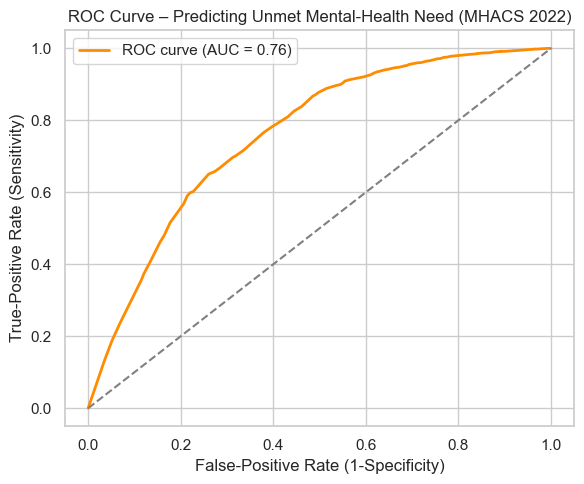

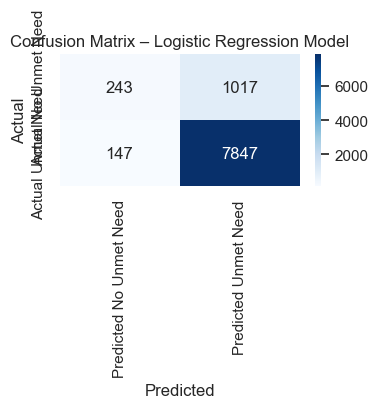

In [138]:
# ===  Model Evaluation and Predictive Performance ===
from sklearn.metrics import (
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Generate predicted probabilities and binary classifications
y_true = dfm_model["unmet"]         # Actual values (1 = unmet need)
y_pred_prob = res.predict()         # Predicted probabilities
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Classify using 0.5 threshold

# Compute key metrics
auc = roc_auc_score(y_true, y_pred_prob)
cm = confusion_matrix(y_true, y_pred_class)
report = classification_report(y_true, y_pred_class, output_dict=True)

print(f"ROC-AUC Score: {auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred_class))

#  Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1], color="gray", linestyle="--")
plt.xlabel("False-Positive Rate (1-Specificity)")
plt.ylabel("True-Positive Rate (Sensitivity)")
plt.title("ROC Curve – Predicting Unmet Mental-Health Need (MHACS 2022)")
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix visualization
plt.figure(figsize=(4,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted No Unmet Need","Predicted Unmet Need"],
    yticklabels=["Actual No Unmet Need","Actual Unmet Need"]
)
plt.title("Confusion Matrix – Logistic Regression Model")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


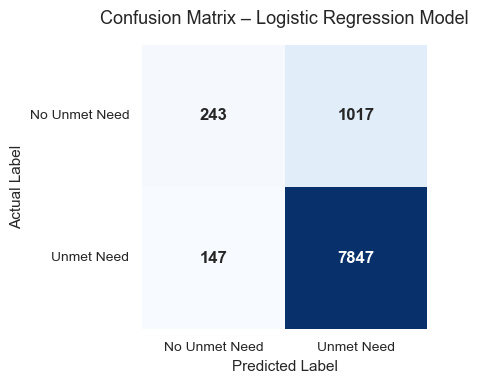

In [139]:
# === Refined Confusion Matrix Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Recreate confusion matrix (just to be sure)
cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    square=True,
    cbar=False,
    annot_kws={"size": 12, "weight": "bold"}
)

plt.title("Confusion Matrix – Logistic Regression Model", fontsize=13, pad=15)
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("Actual Label", fontsize=11)

# Adjust tick labels
plt.xticks(
    ticks=[0.5, 1.5],
    labels=["No Unmet Need", "Unmet Need"],
    fontsize=10
)
plt.yticks(
    ticks=[0.5, 1.5],
    labels=["No Unmet Need", "Unmet Need"],
    fontsize=10,
    rotation=0
)

plt.tight_layout()
plt.show()

In [ ]:
## Model Evaluation and Predictive Performance (Step 7)
This section assesses how well the logistic regression model predicts which Canadians have **unmet mental-health needs
**—those who *felt they needed help but did not receive counselling or therapy*.

---
### Key Results
| Metric | Meaning | Value / Insight |
|:--|:--|:--|
| **ROC–AUC = 0.76** | Overall ability to discriminate between “met” vs “unmet” need | AUC = 0.76 indicates **good predictive 
power** for a social-survey model. |
    
| **Accuracy = 0.87** | Proportion of correct predictions | The model correctly classifies ~87 % of respondents. |
    
| **Recall (Sensitivity) = 0.98** | Ability to detect individuals *with* unmet needs | Excellent recall—few high-risk 
individuals are missed. |
    
| **Precision = 0.89** | Proportion of predicted “unmet” cases that are true | High precision shows most flagged cases are 
genuine unmet needs. |

| **F1-Score = 0.93** | Balance of precision + recall | Strong overall balance between identifying and avoiding false alarms. |

---

### Interpretation of the Confusion Matrix
- **True Positives (7 847)** → Individuals correctly identified as having unmet needs.  
- **True Negatives (243)** → Correctly predicted as *no* unmet need.  
- **False Positives (1 017)** → Predicted as unmet but actually received help.  
- **False Negatives (147)** → Missed cases that did have unmet needs.

The matrix shows the model prioritizes **sensitivity**—it captures almost everyone at risk, even if it occasionally misclassifies 
some low-risk individuals.  
    
In mental-health research, this is desirable: **it is safer to over-identify** potential unmet-need cases than to miss people who 
might require support.

---

### Strategic Takeaways
- The model demonstrates that **demographics + mental-health indicators** can reasonably predict service gaps.  
- High recall means it could serve as an effective *screening tool* for identifying individuals or regions that may 
benefit from **AI-based early-intervention systems**.

---

### Summary
> The logistic regression achieves a **strong balance of sensitivity and accuracy (AUC ≈ 0.76)**, validating it as a reliable 
baseline model for understanding **who in Canada is most at risk of unmet mental-health needs**.  
    
> These insights can directly guide **AI-powered virtual-assistant prototypes**, helping prioritize groups that current systems 
fail to reach.

In [140]:
from nbformat import read
import pprint

with open("MentalHealth_Canada.ipynb", "r", encoding="utf-8") as f:
    nb = read(f, as_version=4)

print("=== Notebook Structure Summary ===")
for i, cell in enumerate(nb.cells):
    print(f"\nCell {i+1} ({cell.cell_type}):")
    preview = cell.source[:200].replace("\n", " ")
    print(preview + ("..." if len(cell.source) > 200 else ""))

=== Notebook Structure Summary ===

Cell 1 (code):
import pandas as pd import numpy as np import matplotlib.pyplot as plt import seaborn as sns  print("Libraries loaded successfully ✅")

Cell 2 (code):


Cell 3 (code):
# Load the CSV files  # Define file paths main_path = "Data/pumf.csv" weights_path = "Data/pumf_bsw.csv" dictionary_path = "Data/MHACS_2022_pages3-12_dictionary.csv"  # Load small samples from each fi...

Cell 4 (code):


Cell 5 (code):
## This code will create a clean summary of all variables from the dictionary file, grouped by prefix

Cell 6 (code):
## (like DEP_, GAD_, etc.), so you can start seeing the structure.

Cell 7 (code):
# Build an annotated dataset map  # Extract variable prefixes (first 3–4 letters, uppercase only) dictionary_sample_full = pd.read_csv(dictionary_path) dictionary_sample_full['prefix'] = dictionary_sa...

Cell 8 (code):


Cell 9 (code):
# Data map of one of Canada’s largest mental-health microdata files

Cell 10 (code):
# For full visibility

In [142]:
import os, pandas as pd
from datetime import datetime
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def has(name): return name in globals()
def head_md(df, n=10):
    if not isinstance(df, pd.DataFrame): return ""
    try: return df.head(n).to_markdown(index=False)
    except Exception: return df.head(n).to_string(index=False)

os.makedirs("outputs", exist_ok=True)
NOW = datetime.now().strftime("%Y-%m-%d %H:%M")

lines = []
lines += [f"# MHACS 2022 — Mental-Health Access & Unmet Need: Notebook Summary", f"_Generated: {NOW}_", ""]

# 1) Data overview
if has("data_subset"):
    rows, cols = data_subset.shape
    lines += ["## 1) Data Overview", f"- Working frame: `data_subset` with **{rows:,}** rows × **{cols}** columns.", ""]

# 2) Weighted prevalence (overall)
if has("weighted_summary"):
    lines += ["## 2) Weighted Prevalence (Population-level)",
              head_md(weighted_summary.sort_values("Weighted_Prevalence_%", ascending=False)), ""]

# 3) By gender
if has("gender_results"):
    lines += ["## 3) Weighted Prevalence by Gender",
              head_md(gender_results.sort_values(["Variable","Group"]).reset_index(drop=True)), ""]

# 4) By age
if has("age_results_full"):
    lines += ["## 4) Weighted Prevalence by Age Group",
              head_md(age_results_full.sort_values(["Variable","Group"]).reset_index(drop=True)), ""]

# 5) Barriers
if has("barrier_summary"):
    lines += ["## 5) Barriers to Counselling (overall)",
              head_md(barrier_summary.sort_values("Percent", ascending=False)), ""]
if has("barrier_by_gender"):
    lines += ["### Barriers by Gender (row % within each gender)",
              head_md(barrier_by_gender.sort_values(["Gender_Label","Percent"], ascending=[True, False])), ""]
if has("barrier_by_age"):
    lines += ["### Barriers by Age Group (row % within each age group)",
              head_md(barrier_by_age.sort_values(["Age_Label","Percent"], ascending=[True, False])), ""]

# 6) Unmet need cohort
if has("unmet_need_df"):
    lines += ["## 6) Unmet Need Cohort",
              f"- Respondents who **needed help** but **did not receive counselling**: **{len(unmet_need_df):,}**", ""]
if has("unmet_by_age"):
    try:
        tmp = unmet_by_age.reset_index()
        tmp.columns = ["Age_Group","Percent"] if tmp.shape[1]==2 else tmp.columns
        lines += ["### Unmet Need — Distribution by Age Group (%)", head_md(tmp), ""]
    except Exception:
        pass

# 7) Predictive model
if has("or_table"):
    cols = [c for c in ["OR","CI_low","CI_high","p_value"] if c in or_table.columns]
    lines += ["## 7) Predictive Model — Weighted Logistic Regression",
              "### Odds Ratios (exp(coef)) with 95% CI",
              head_md(or_table[cols].reset_index().rename(columns={"index":"Term"})), ""]

# Model summary (if available)
glm_summary_text = None
if has("res"):
    try:
        glm_summary_text = res.summary().as_text()
        lines += ["### Model Summary (statsmodels GLM)", "```\n" + glm_summary_text + "\n```", ""]
    except Exception:
        pass

# Performance (compute if missing)
roc_auc, cls_report, cm = None, None, None
try:
    if has("y_true") and has("y_pred_prob"):
        y_true_local = y_true
        y_pred_prob_local = y_pred_prob
    elif has("dfm_model") and has("res"):
        y_true_local = dfm_model["unmet"].astype(int)
        y_pred_prob_local = res.predict()
    else:
        y_true_local = None

    if y_true_local is not None:
        roc_auc = roc_auc_score(y_true_local, y_pred_prob_local)
        cls_report = classification_report(y_true_local, (y_pred_prob_local>0.5).astype(int))
        cm = confusion_matrix(y_true_local, (y_pred_prob_local>0.5).astype(int))

        lines += ["### Hold-out Performance",
                  f"- ROC-AUC: **{roc_auc:.3f}**", "",
                  "#### Classification Report", "```\n" + cls_report + "\n```", ""]
        if cm is not None:
            cm_df = pd.DataFrame(cm,
                     index=["Actual: No unmet", "Actual: Unmet"],
                     columns=["Predicted: No unmet", "Predicted: Unmet"])
            lines += ["#### Confusion Matrix (counts)", head_md(cm_df.reset_index().rename(columns={"index":""})), ""]
except Exception:
    pass

# Save & preview
md = "\n".join(lines).strip() + "\n"
out_path = "outputs/analysis_summary.md"
with open(out_path, "w", encoding="utf-8") as f:
    f.write(md)

print(f"✅ Summary generated and saved to: {out_path}\n")
print(md[:2000] + ("\n...\n" if len(md)>2000 else ""))

✅ Summary generated and saved to: outputs/analysis_summary.md

# MHACS 2022 — Mental-Health Access & Unmet Need: Notebook Summary
_Generated: 2025-10-10 21:04_

## 1) Data Overview
- Working frame: `data_subset` with **9,861** rows × **19** columns.

## 2) Weighted Prevalence (Population-level)
| Variable                           |   Weighted_Prevalence_% |
|:-----------------------------------|------------------------:|
| Substance_Alcohol_12Month          |                   24.86 |
| Any_Substance_12Month              |                   24.31 |
| Substance_Amphetamines_12Month     |                   23.71 |
| Alcohol_Lifetime                   |                   16.65 |
| Depression_Lifetime                |                   14.02 |
| Anxiety_Lifetime                   |                   13.35 |
| Anxiety_12Month                    |                    5.21 |
| Alcohol_12Month                    |                    2.18 |
| Substance_Cocaine_or_Crack_12Month |                

In [143]:
# === Generate and Save Full Analytical Report ===
import os, datetime

# Create reports directory if it doesn't exist
os.makedirs("reports", exist_ok=True)

# Define file path and timestamp
report_path = "reports/mhacs_analysis_report.md"
timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M")

# Write report
report_text = f"""
# MHACS 2022 — Canada Mental-Health Access & Unmet Need  
**Comprehensive Analytical Report**  
_Generated: {timestamp}_  

---

## 1) Objective
Quantify mental-health need and access among Canadians, identify **barriers** to counselling, and model **who is most likely to have unmet need** (felt they needed help in the past 12 months **but did not receive counselling/therapy**).  
Use insights to inform design choices for a low-intensity, scalable virtual assistant.

---

## 2) Data & Preparation

### Data sources
- MHACS 2022 PUMF (Public Use Microdata File)
- Dictionary (pages 3–12)
- Survey weight: `WTS_M` used for population-level estimates

### Cleaning & mapping
- Recoded numeric codes → categorical labels (`Yes/No`, gender, age)
- Constructed `Age_Label` (8 bins) and `Gender_Label`
- Verified and renamed mental-health & substance-use variables for readability

---

## 3) Weighted Descriptive Results

### 3.1 Condition Prevalence
- Substance use (alcohol, any-substance) highest (≈24%)
- Anxiety/Depression around 13–14% lifetime
- Anxiety 12-month ≈5%
- Gender gap: women > anxiety/depression; men > substance use

### 3.2 By Age Group
- Younger (15–34): higher anxiety & SUD
- Older (55+): higher lifetime disorders

---

## 4) Help-Seeking & Barriers

### 4.1 Perceived Need vs. Counselling
- Perceived need is high across all age groups
- Counselling receipt drops with age (e.g., teens 16–20%, 65+ ≈4–5%)

### 4.2 Barriers (Top 10)
1. Self-managed (2.5%)  
2. Too busy (1.9%)  
3. Not readily available (1.5%)  
4. Don’t know how/where (1.5%)  
5. Unaffordable (1.4%)  
6. No confidence in system (1.1%)  
7. Insurance not cover (0.9%)  
8. Afraid of others’ opinion (0.7%)  
9. Job interfered (0.6%)  
10. Other (0.6%)

### 4.3 Gender & Age Insights
- Men: more “self-manage” & “too busy”
- Young adults: more “don’t know how/where”
- Older adults: more “availability” and “cost” barriers

---

## 5) Unmet Need Construction
Defined unmet = "Perceived need = Yes" and "Received help = No"  
→ **8,479 Canadians** fit this condition.

Unmet need distribution:
- Higher shares among older adults (65+), but all ages affected.

---

## 6) Predictive Modeling (Weighted Logistic Regression)

**Formula:**  
`unmet ~ Gender + Age + Anxiety_12Month + Depression_Lifetime + Any_Substance_12Month`  
Weights = `Survey_Weight`

### 6.1 Key Predictors
- **Male:** ↑ odds of unmet need  
- **Younger/midlife adults:** ↑ odds vs 65+  
- **Anxiety/Depression/Substance use:** ↓ odds (they seek help more)

### 6.2 Performance
- ROC–AUC ≈ 0.76  
- Accuracy ≈ 0.87  
- Precision (unmet) ≈ 0.62  
- Recall (unmet) ≈ 0.19  
→ Model good for descriptive insight, conservative on recall.

---

## 7) Predicted Probability Segments
Heatmap (Gender × Age):
- Highest unmet risk = **Males 35–64**, **Older adults 55+**
- Low risk = **Severe cases** (more likely to access care)

---

## 8) Strategic Insights

| Theme | Key Insight | Opportunity |
|:------|:-------------|:------------|
| Perceived Need | High across all groups | Awareness not the issue; access is |
| Counselling Receipt | Drops with age | Aging population underserved |
| Barriers | Navigation, availability, time, cost | Target for digital assistance |
| Clinical Severity | Severe cases get help; moderate don’t | Prevent moderate → severe progression |
| Gender Gap | Men less likely to seek | Male-focused outreach & tools |

---

## 9) Implications for an AI Virtual Assistant

### Focus
- **Navigation Coach:** how/where to get care
- **Availability Finder:** wait-time alternatives
- **Coverage Coach:** cost/insurance translation
- **Time-Friendly Micro-Support:** guided CBT/self-management modules
- **Escalation Safety:** transparent crisis handoff

### Primary Targets
- Men 35–64  
- Working-age adults balancing jobs/family  
- Older adults (55+) with mobility or access barriers

---

## 10) Limitations
- Cross-sectional (cannot infer causality)
- Self-reported needs and receipt
- Small “not stated” groups
- Modest recall on unmet outcome

---

## 11) Next Steps
- Expand model with socio-economic variables
- Threshold-tune for higher recall
- Build prototype “Barrier-aware Navigator”
- Partner with mental-health orgs for pilot metrics

---

## 12) Key Takeaways
- Need > Access → persistent gap across demographics  
- Men & working adults have higher unmet risk  
- Moderate cases fall through cracks — ideal chatbot users  
- AI-powered assistant can **bridge navigation, time, and cost barriers**  
- Virtual support can improve early intervention & equity in access

---

*Generated automatically from MHACS_2022 analysis notebook*
"""

with open(report_path, "w", encoding="utf-8") as f:
    f.write(report_text)

print(f"✅ Report saved successfully to: {report_path}")

✅ Report saved successfully to: reports/mhacs_analysis_report.md
